# Latar Belakang

# Pernyataan Masalah

Driver taksi perlu menurunkan waktu tunggu dan mengurangi "nyangkut"nya mobil taksi di zona sepi penumpang. Saat ini alokasi supply taksi masih berbasis aturan umum/intuisi sehingga dikhawatirkan dapat menimbulkan terjadinya ketidakseimbangan arus: banyak pickup di satu zona/jam tertentu tetapi dropoff mendistribusikan taksi ke zona yang tidak produktif. Ini bisa berakibat pendapatan driver taksi per menit/mil turun dan pengalaman pelanggan memburuk. 

Sebagai data analyst kita akan mencoba menjawab pertanyaan berikut: Bagaimana pola permintaan dan ketidakseimbangan arus perjalanan (origin-destination)?

# Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/Winonathea/Downloads/NYC TLC Trip Record.csv")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


# Deskripsi Variabel Dataset NYC Taxi

Deskripsi ini menjelaskan tentang setiap variabel yang terdapat pada dataset perjalanan taksi di New York City. Dataset ini dikumpulkan oleh New York City Taxi and Limousine Commission (TLC) dan berisi informasi detail mengenai transaksi taksi, mulai dari waktu penjemputan dan pengantaran, lokasi, jarak perjalanan, jumlah penumpang, hingga rincian pembayaran. Setiap variabel dalam dataset memiliki fungsi penting untuk memahami pola permintaan transportasi, perilaku perjalanan penumpang, kinerja pengemudi, serta aspek ekonomi seperti pendapatan, biaya tambahan, dan metode pembayaran. 

* VendorID
Kode penyedia LPEP (trip provider).
1 = Creative Mobile Technologies, LLC.
2 = VeriFone Inc.
* lpep_pickup_datetime
Tanggal dan waktu saat argo/meter dinyalakan (pickup).
* lpep_dropoff_datetime
Tanggal dan waktu saat argo/meter dimatikan (drop-off).
* Passenger_count
Jumlah penumpang dalam kendaraan. (Nilai ini diinput oleh pengemudi).
* Trip_distance
Jarak perjalanan (dalam mil) yang tercatat oleh taximeter.
* PULocationID
ID zona TLC di mana perjalanan dimulai (pickup).
* DOLocationID
ID zona TLC di mana perjalanan berakhir (drop-off).
* RateCodeID
Kode tarif yang berlaku di akhir perjalanan:
1 = Standard rate
2 = JFK
3 = Newark
4 = Nassau atau Westchester
5 = Negotiated fare
6 = Group ride
* Store_and_fwd_flag
Indikator apakah data perjalanan disimpan dulu di memori kendaraan sebelum dikirim ke server vendor.
Y = ya (store and forward)
N = tidak
* Payment_type
Kode cara pembayaran:
1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip
* Fare_amount
Biaya perjalanan berdasarkan waktu dan jarak sesuai meter.
* Extra
Tambahan biaya lain (surcharge), misalnya $0.50 atau $1 untuk jam sibuk/overnight.
* MTA_tax
Pajak MTA sebesar $0.50 yang otomatis berlaku sesuai tarif.
* Improvement_surcharge
Biaya tambahan $0.30 yang dikenakan sejak 2015 pada setiap perjalanan (flag drop).
* Tip_amount
Jumlah tip (hanya otomatis tercatat untuk pembayaran kartu kredit, tidak termasuk tip tunai).
* Tolls_amount
Total biaya tol yang dibayar pada perjalanan.
* Total_amount
Total biaya perjalanan yang dibebankan ke penumpang (tidak termasuk tip tunai).
* Trip_type
Jenis perjalanan:
1 = Street-hail (langsung di jalan)
2 = Dispatch (pemesanan melalui aplikasi/dispatch system)

## Data Understanding and Cleaning

Sebelum masuk ke tahap analisis, kita perlu mengenal dataset taksi New York City lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan mengetahui karakteristik utama dari data, termasuk pola umum perjalanan, serta potensi anomali yang muncul seperti nilai yang hilang, data duplikat, atau nilai ekstrim yang tidak wajar.

Setiap anomali yang teridentifikasi akan ditangani pada tahap data cleaning. Proses pembersihan ini disertai dengan justifikasi mengapa sebuah data dianggap tidak wajar dan bagaimana keputusan penanganannya, baik berdasarkan domain knowledge (misalnya, tarif minimum resmi taksi NYC) maupun pendekatan statistik.

### Tipe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [5]:
# ubah kolom lpep_pickup_datetime dan lpep_dropoff_datetime menjadi tipe datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [6]:
# kolom numerik : trip distance, fare amount, tip amount, tolls amount, total amount, extra, mta tax, improvement surcharge, passenger count , congestion surcharge
# kolom kategorik : RatecodeID, PULocationID, DOLocationID, payment_type, trip_type, VendorID, store_and_fwd_flag

In [7]:
df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)
df['RatecodeID'] = df['RatecodeID'].astype(str)
df['payment_type'] = df['payment_type'].astype(str)
df['trip_type'] = df['trip_type'].astype(str)
df['VendorID'] = df['VendorID'].astype(str)

In [8]:
df.describe(include = 'all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211,68211,68211,63887,68211,68211,68211,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,68211,68211,63887.000000
unique,2,NaN,NaN,2,7,226,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,NaN
top,2,NaN,NaN,N,1.0,74,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
freq,58868,NaN,NaN,63579,62103,13257,3524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40686,62476,NaN
mean,NaN,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,NaN,NaN,NaN,NaN,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,NaN,NaN,0.726748
min,NaN,2009-01-01 20:21:27,2009-01-02 11:07:31,NaN,NaN,NaN,NaN,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,NaN,NaN,-2.750000
25%,NaN,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,NaN,NaN,NaN,NaN,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,NaN,NaN,0.000000
50%,NaN,2023-01-17 08:40:42,2023-01-17 08:56:38,NaN,NaN,NaN,NaN,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,NaN,NaN,0.000000
75%,NaN,2023-01-24 15:52:30,2023-01-24 16:06:56,NaN,NaN,NaN,NaN,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,NaN,NaN,2.750000
max,NaN,2023-02-01 03:10:05,2023-02-01 17:27:05,NaN,NaN,NaN,NaN,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,NaN,NaN,2.750000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  object        
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             68211 non-null  object        
 5   PULocationID           68211 non-null  object        
 6   DOLocationID           68211 non-null  object        
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

### Unique Values

In [10]:
for col in ['VendorID','RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'trip_type','store_and_fwd_flag']:
  print(df.value_counts([col], dropna = False).reset_index(name = 'jumlah'))

  VendorID  jumlah
0        2   58868
1        1    9343
  RatecodeID  jumlah
0        1.0   62103
1        nan    4324
2        5.0    1529
3        2.0     158
4        4.0      57
5        3.0      30
6       99.0      10
    PULocationID  jumlah
0             74   13257
1             75    9109
2             41    4058
3            166    3879
4             95    3839
..           ...     ...
221          194       1
222          221       1
223           68       1
224          214       1
225            1       1

[226 rows x 2 columns]
    DOLocationID  jumlah
0             75    3524
1             74    3394
2            236    2764
3             41    2624
4             42    2341
..           ...     ...
244          115       1
245          111       1
246          214       1
247           27       1
248          187       1

[249 rows x 2 columns]
  payment_type  jumlah
0          1.0   40686
1          2.0   22632
2          nan    4324
3          3.0     472
4          4

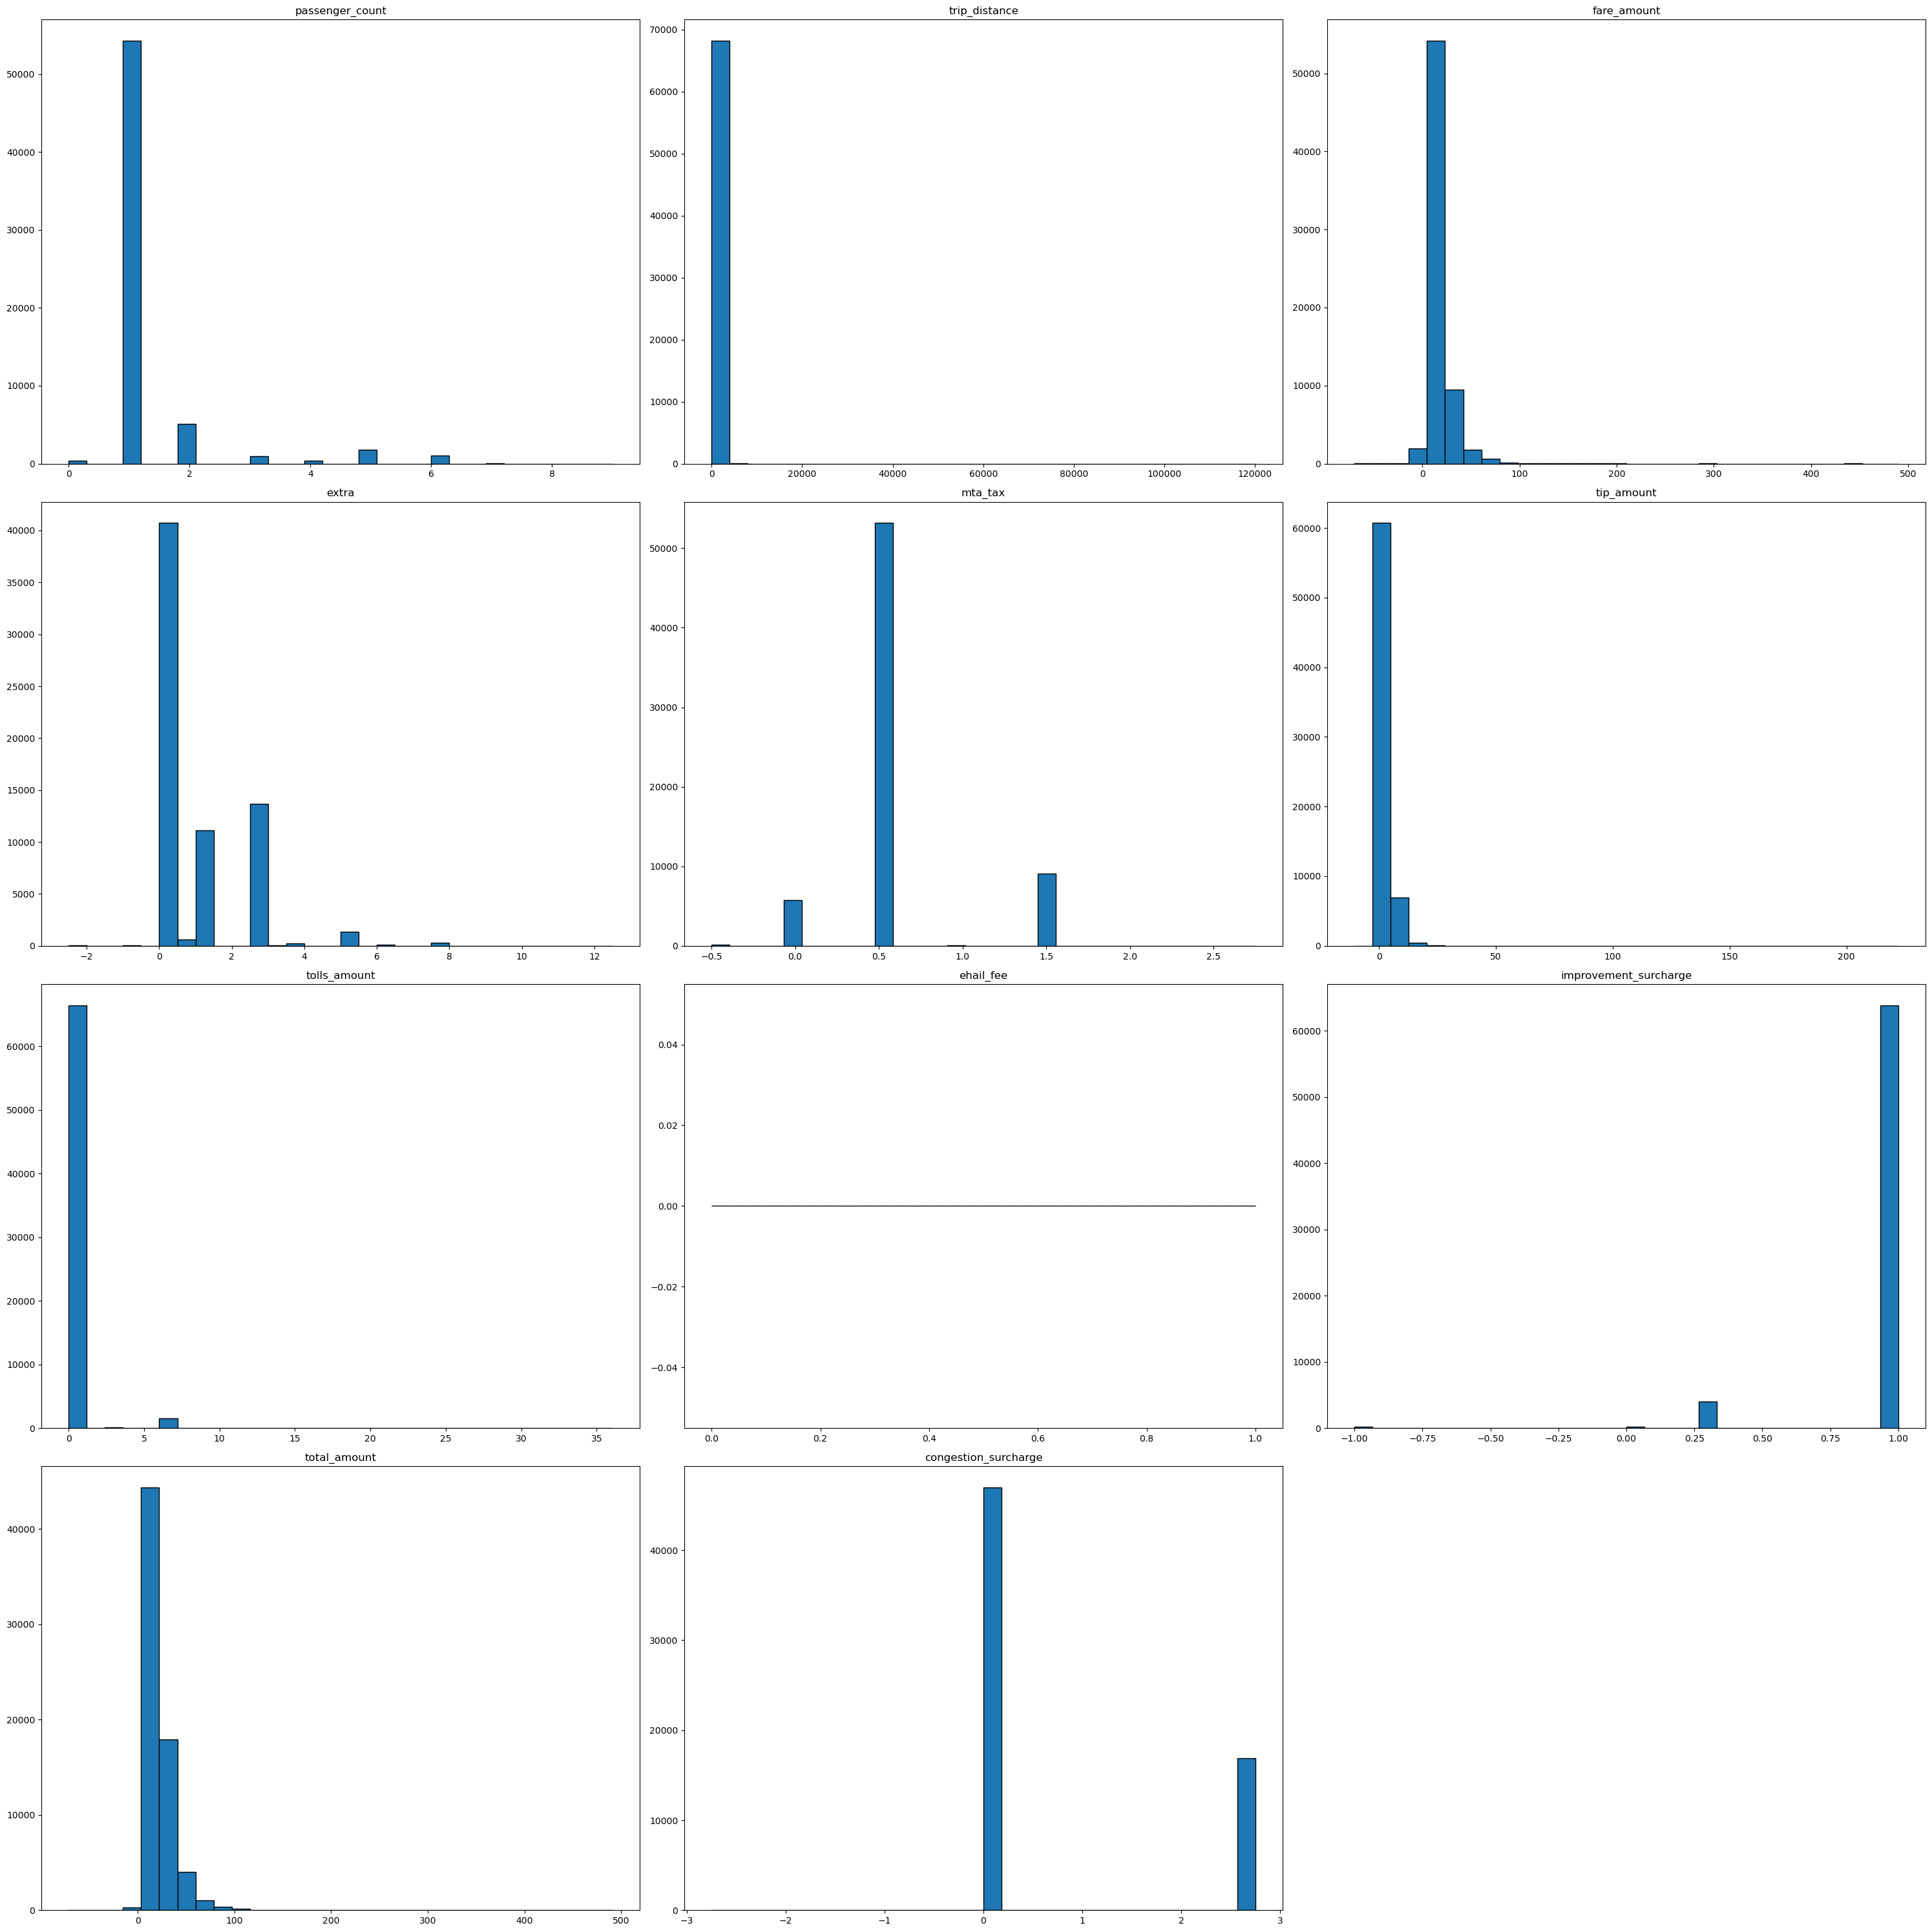

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num = df.select_dtypes(include='number')   # ambil yang numerik saja
ax = num.hist(bins=30, figsize=(30, 30), grid=False, edgecolor='black')
plt.tight_layout()


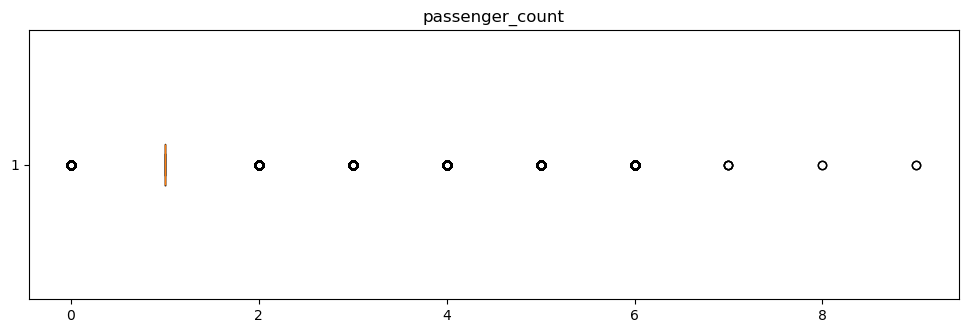

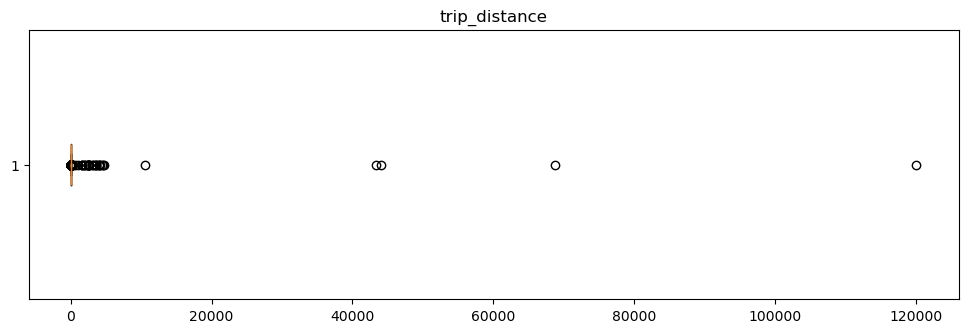

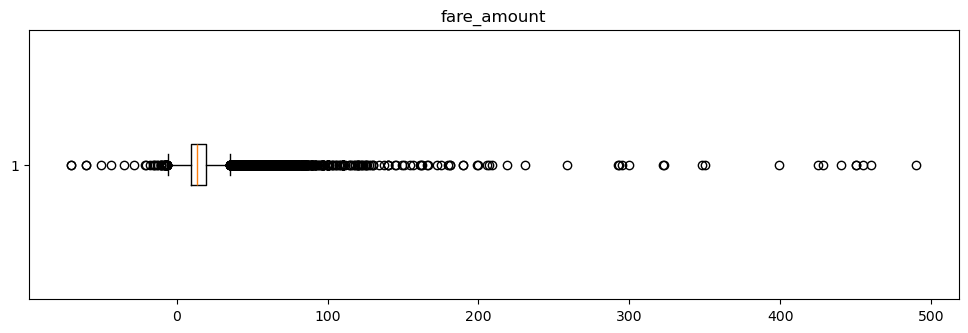

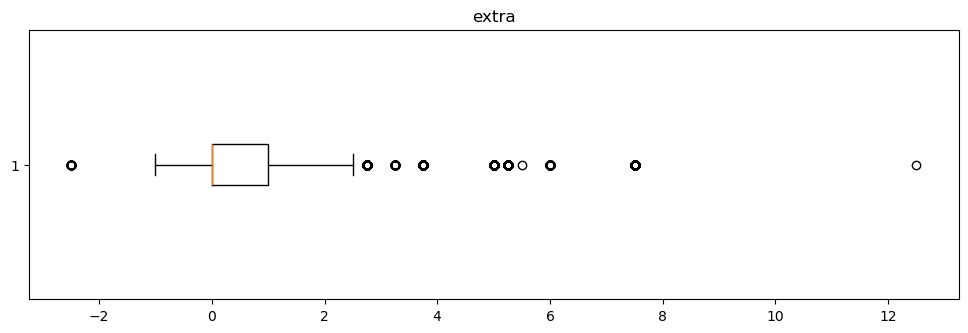

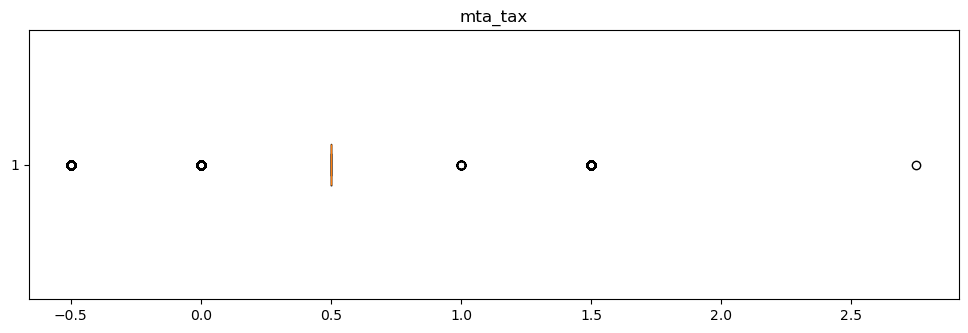

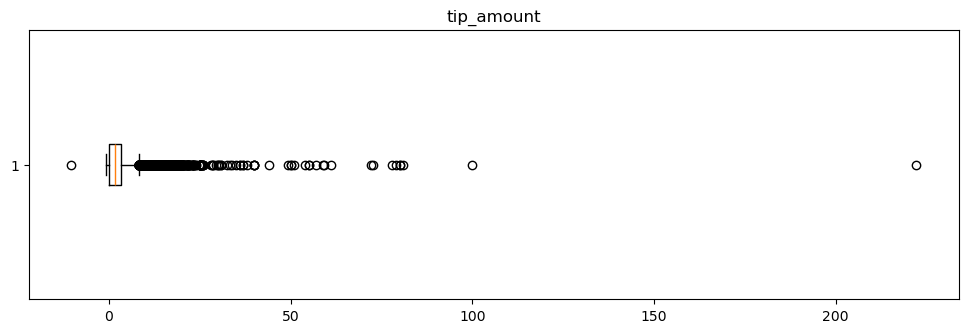

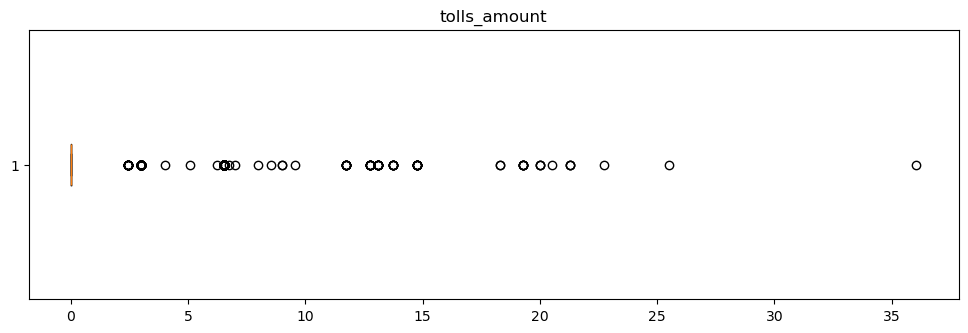

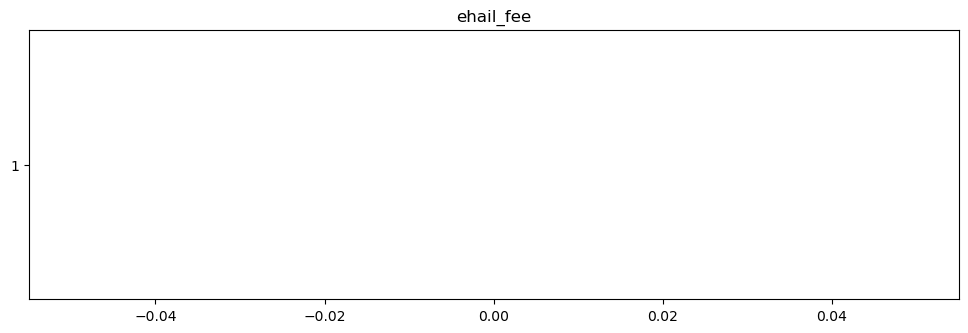

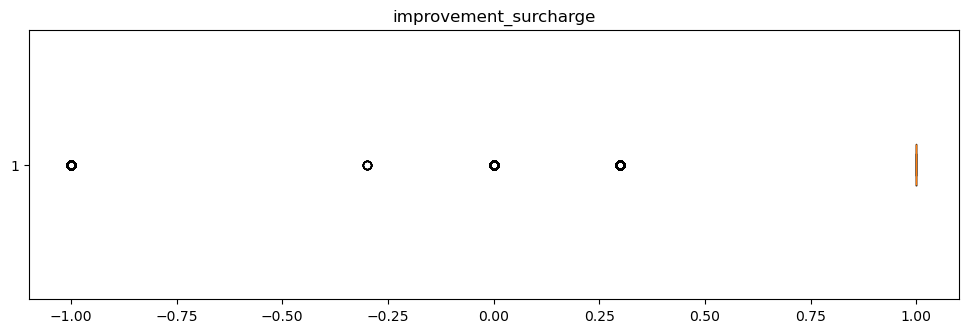

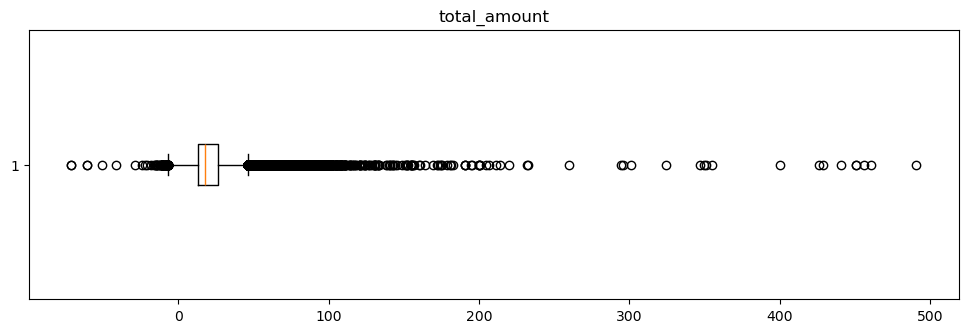

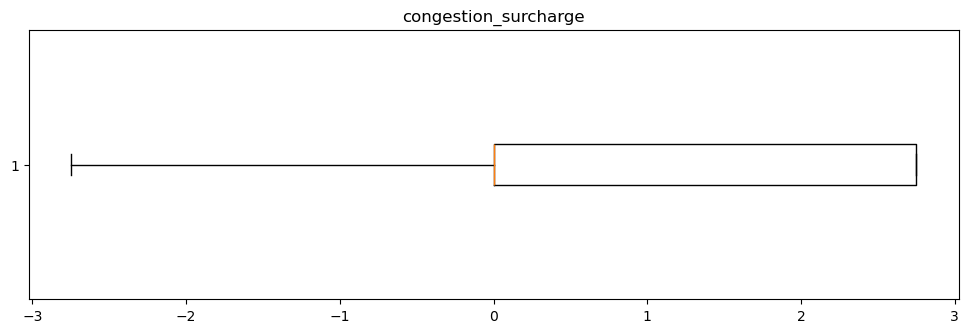

In [12]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(12, 3.5))  # atur gede-nya di sini
    ax.boxplot(df[col].dropna(), vert=False, showfliers=True)
    ax.set_title(col)
    ax.grid(False)
    plt.show()



In [13]:
df['lpep_dropoff_datetime'].dt.year.value_counts()

lpep_dropoff_datetime
2023    68208
2022        2
2009        1
Name: count, dtype: int64

In [14]:
df['lpep_pickup_datetime'].dt.year.value_counts()

lpep_pickup_datetime
2023    68208
2022        2
2009        1
Name: count, dtype: int64

* tahun 2022 dan 2009 sepertinya salah input, di drop aja 

In [15]:
df = df[df['lpep_pickup_datetime'].dt.year == 2023]
df['lpep_pickup_datetime'].dt.year.value_counts()

lpep_pickup_datetime
2023    68208
Name: count, dtype: int64

In [16]:
df['lpep_dropoff_datetime'].dt.year.value_counts()

lpep_dropoff_datetime
2023    68208
Name: count, dtype: int64

In [17]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [18]:
df[(df['fare_amount']<0)&(df['total_amount'] >0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [19]:
len(df[df['total_amount']<0])/len(df)

0.0026243255923058878

ada beberapa baris yang harga taksinya negatif, biasanya ini artinya trip dicancel, dan kurang berhubungan dengan analisa
sehingga akan di drop aja, karena banyak datanya juga hanya 0.26% dari total baris

In [20]:
df = df[df['total_amount'] >= 0]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,nan,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,nan,nan,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,nan,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,nan,nan,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,nan,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,nan,nan,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,nan,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,nan,nan,NaN


semua baris pada kolom ehail fee juga bernilai kosong, sehingga akan di drop

In [21]:
df = df.drop(columns = ['ehail_fee'])
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,nan,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,nan,nan,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,nan,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,nan,nan,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,nan,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,nan,nan,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,nan,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,nan,nan,NaN


In [22]:
df[df.duplicated(subset = ['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID','total_amount'])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


Setelah pengecekan ternyata tidak ada duplikat

In [24]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


### Missing Values

In [25]:
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4319
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4319
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge     4319
dtype: int64

In [26]:
df[df['store_and_fwd_flag'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,nan,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,nan,nan,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,nan,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,nan,nan,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,nan,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,nan,nan,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,nan,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,nan,nan,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,nan,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,nan,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,nan,nan,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,nan,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,nan,nan,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,nan,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,nan,nan,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,nan,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,nan,nan,NaN


In [27]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     61937
nan      4319
5.0      1520
2.0       156
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [28]:
df['payment_type'].value_counts()

payment_type
1.0    40685
2.0    22627
nan     4319
3.0      333
4.0       63
5.0        2
Name: count, dtype: int64

In [29]:
df['trip_type'].value_counts()

trip_type
1.0    62307
nan     4329
2.0     1393
Name: count, dtype: int64

Akan diubah string nan pada kolom menjadi NaN

In [30]:
df['RatecodeID'] = df['RatecodeID'].replace('nan',pd.NA)
df['RatecodeID'].value_counts()

RatecodeID
1.0     61937
5.0      1520
2.0       156
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

Kolom ratecodeID harus bernilai 1 - 5

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68029 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68029 non-null  object        
 1   lpep_pickup_datetime   68029 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68029 non-null  datetime64[ns]
 3   store_and_fwd_flag     63710 non-null  object        
 4   RatecodeID             63710 non-null  object        
 5   PULocationID           68029 non-null  object        
 6   DOLocationID           68029 non-null  object        
 7   passenger_count        63710 non-null  float64       
 8   trip_distance          68029 non-null  float64       
 9   fare_amount            68029 non-null  float64       
 10  extra                  68029 non-null  float64       
 11  mta_tax                68029 non-null  float64       
 12  tip_amount             68029 non-null  float64       
 13  tolls_

In [32]:
df[df['RatecodeID'] == '99.0']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,nan,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,nan,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,nan,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,nan,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,nan,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,nan,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,nan,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,nan,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,nan,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,nan,0.0


In [33]:
df[(df['VendorID'] == '1') & (df['PULocationID'].isin(['150', '73', '14', '61', '108', '90', '265', '244']) & df['DOLocationID'].isin(['55', '82', '123', '77', '181', '68', '248'])) & (df['passenger_count'] == 1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,nan,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,nan,0.0
2289,1,2023-01-02 17:07:45,2023-01-02 17:26:42,N,1.0,73,82,1.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,1.0,0.0
2619,1,2023-01-02 20:26:58,2023-01-02 20:47:43,N,1.0,14,123,1.0,0.0,22.2,0.0,1.5,0.0,0.0,1.0,23.7,1.0,1.0,0.0
6148,1,2023-01-04 16:12:18,2023-01-04 16:31:01,N,1.0,14,55,1.0,0.0,20.2,0.0,1.5,0.0,0.0,1.0,21.7,1.0,1.0,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,nan,0.0
9056,1,2023-01-05 20:33:56,2023-01-05 20:52:13,Y,1.0,14,123,1.0,0.0,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,1.0,0.0
11390,1,2023-01-06 20:44:13,2023-01-06 21:12:56,N,1.0,265,123,1.0,0.0,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,1.0,0.0
12901,1,2023-01-07 16:54:29,2023-01-07 18:01:53,N,1.0,265,55,1.0,0.0,47.2,0.0,1.5,0.0,0.0,1.0,48.7,1.0,1.0,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,nan,0.0


Akan diganti ratecode ID == 99 menjadi 1 karena modus nilai rate yang lain bernilai 1 untuk titik lokasi yang sama


In [34]:
df.loc[(df['RatecodeID'].isin(['99.0'])),'RatecodeID'] = '1.0'
df[df['RatecodeID'].isin(['99.0'])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [35]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    61947
5.0     1520
2.0      156
4.0       57
3.0       30
Name: count, dtype: int64

In [36]:
df['RatecodeID'].isnull().sum()

np.int64(4319)

In [37]:
df['payment_type'] = df['payment_type'].replace('nan',pd.NA)
df['payment_type'].isnull().sum()

np.int64(4319)

In [38]:
df['payment_type'].value_counts()

payment_type
1.0    40685
2.0    22627
3.0      333
4.0       63
5.0        2
Name: count, dtype: int64

In [39]:
df['trip_type'] = df['trip_type'].replace('nan',pd.NA)
df['trip_type'].isnull().sum()

np.int64(4329)

In [40]:
df['trip_type'].value_counts(dropna=False)

trip_type
1.0     62307
<NA>     4329
2.0      1393
Name: count, dtype: int64

In [41]:
df[df['store_and_fwd_flag'].isna()]['VendorID'].value_counts()

VendorID
2    4191
1     128
Name: count, dtype: int64

In [42]:
df[df['store_and_fwd_flag'].isna()]['lpep_pickup_datetime'].dt.month.value_counts()

lpep_pickup_datetime
1    4319
Name: count, dtype: int64

In [43]:
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4319
RatecodeID               4319
PULocationID                0
DOLocationID                0
passenger_count          4319
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4319
trip_type                4329
congestion_surcharge     4319
dtype: int64

In [44]:
df[df['lpep_pickup_datetime'].dt.month == 1].isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4319
RatecodeID               4319
PULocationID                0
DOLocationID                0
passenger_count          4319
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4319
trip_type                4329
congestion_surcharge     4319
dtype: int64

semua baris yang null ada di bulan 1 dan mereka semua berada baris yang sama, yaitu 1 baris yang memiliki null pada kolom store and fwd flag, maka semua kolom lainnya yang memiliki null pasti berupa kolom yang sama

berarti missing values tidak acak, sementara juga kolom yang null tidak berpengaruh pada tema analisa
sehingga mau diisi dengan placeholder

In [45]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('unknown')
df['payment_type'] = df['payment_type'].fillna('unknown')
df['trip_type'] = df['trip_type'].fillna('unknown')
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               4319
PULocationID                0
DOLocationID                0
passenger_count          4319
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge        0
dtype: int64

In [46]:
df['RatecodeID'] = df['RatecodeID'].fillna('unknown')

In [47]:
df[df['VendorID'] == '1']['passenger_count'].describe()

count    9215.000000
mean        1.114921
std         0.506234
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: passenger_count, dtype: float64

In [48]:
df[(df['lpep_pickup_datetime'].dt.month == 1) & (df['VendorID'] == '1')]['passenger_count'].describe()

count    9215.000000
mean        1.114921
std         0.506234
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: passenger_count, dtype: float64

In [51]:
#df['passenger_count'] = df['passenger_count'].fillna(1)
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4319
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge        0
dtype: int64

### Penjumlahan total amount yang salah dengan hasil total semua kolom terkait fee

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68029 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68029 non-null  object        
 1   lpep_pickup_datetime   68029 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68029 non-null  datetime64[ns]
 3   store_and_fwd_flag     68029 non-null  object        
 4   RatecodeID             68029 non-null  object        
 5   PULocationID           68029 non-null  object        
 6   DOLocationID           68029 non-null  object        
 7   passenger_count        63710 non-null  float64       
 8   trip_distance          68029 non-null  float64       
 9   fare_amount            68029 non-null  float64       
 10  extra                  68029 non-null  float64       
 11  mta_tax                68029 non-null  float64       
 12  tip_amount             68029 non-null  float64       
 13  tolls_

In [53]:
# fare amount + extra + mta tax + tip amount + tolls amount + improvement_surcharge + congestion_surcharge = total_amount

In [54]:
components = [
    'fare_amount','extra','mta_tax','tip_amount',
    'tolls_amount','improvement_surcharge','congestion_surcharge'  
]

present = [c for c in components if c in df.columns]

df[present] = df[present].apply(pd.to_numeric, errors='coerce')

df['totalfee'] = df[present].sum(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68029 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68029 non-null  object        
 1   lpep_pickup_datetime   68029 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68029 non-null  datetime64[ns]
 3   store_and_fwd_flag     68029 non-null  object        
 4   RatecodeID             68029 non-null  object        
 5   PULocationID           68029 non-null  object        
 6   DOLocationID           68029 non-null  object        
 7   passenger_count        63710 non-null  float64       
 8   trip_distance          68029 non-null  float64       
 9   fare_amount            68029 non-null  float64       
 10  extra                  68029 non-null  float64       
 11  mta_tax                68029 non-null  float64       
 12  tip_amount             68029 non-null  float64       
 13  tolls_

In [55]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,totalfee
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,15.84
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,11.64
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,11.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,9.00


In [56]:
df['diff_fee'] = round(df['total_amount'] - df['totalfee'],3)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,totalfee,diff_fee
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,24.18,0.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,15.84,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,11.64,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,11.20,-1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,9.00,-1.0


### Outliers

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68029 entries, 0 to 68210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68029 non-null  object        
 1   lpep_pickup_datetime   68029 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68029 non-null  datetime64[ns]
 3   store_and_fwd_flag     68029 non-null  object        
 4   RatecodeID             68029 non-null  object        
 5   PULocationID           68029 non-null  object        
 6   DOLocationID           68029 non-null  object        
 7   passenger_count        63710 non-null  float64       
 8   trip_distance          68029 non-null  float64       
 9   fare_amount            68029 non-null  float64       
 10  extra                  68029 non-null  float64       
 11  mta_tax                68029 non-null  float64       
 12  tip_amount             68029 non-null  float64       
 13  tolls_

In [58]:
# cek outlier tahun, bulan, hari, jam

In [59]:
df['pickup_month']        = df['lpep_pickup_datetime'].dt.month           # 1..12
df['pickup_day']          = df['lpep_pickup_datetime'].dt.day             # tanggal 1..31
df['pickup_weekday_name'] = df['lpep_pickup_datetime'].dt.day_name()      # "Monday", dst
df['pickup_hour']         = df['lpep_pickup_datetime'].dt.hour            # 0..23
df['pickup_minute']       = df['lpep_pickup_datetime'].dt.minute          # 0..59

In [60]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,1.0,2.75,24.18,0.0,1,1,Sunday,0,26
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,1.0,0.00,15.84,0.0,1,1,Sunday,0,51
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,1.0,0.00,11.64,0.0,1,1,Sunday,0,35
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,1.0,0.00,11.20,-1.0,1,1,Sunday,0,13
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,1.0,0.00,9.00,-1.0,1,1,Sunday,0,33


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68029 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68029 non-null  object        
 1   lpep_pickup_datetime   68029 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68029 non-null  datetime64[ns]
 3   store_and_fwd_flag     68029 non-null  object        
 4   RatecodeID             68029 non-null  object        
 5   PULocationID           68029 non-null  object        
 6   DOLocationID           68029 non-null  object        
 7   passenger_count        63710 non-null  float64       
 8   trip_distance          68029 non-null  float64       
 9   fare_amount            68029 non-null  float64       
 10  extra                  68029 non-null  float64       
 11  mta_tax                68029 non-null  float64       
 12  tip_amount             68029 non-null  float64       
 13  tolls_

In [62]:
# cek outlier yg numerik dan kategorik

  VendorID  jumlah
0        2   58686
1        1    9343
  RatecodeID  jumlah
0        1.0   61947
1    unknown    4319
2        5.0    1520
3        2.0     156
4        4.0      57
5        3.0      30
    PULocationID  jumlah
0             74   13243
1             75    9085
2             41    4045
3            166    3875
4             95    3830
..           ...     ...
221          194       1
222          221       1
223           68       1
224          214       1
225            1       1

[226 rows x 2 columns]
    DOLocationID  jumlah
0             75    3505
1             74    3377
2            236    2761
3             41    2610
4             42    2336
..           ...     ...
244          214       1
245          115       1
246          111       1
247           27       1
248          187       1

[249 rows x 2 columns]
  payment_type  jumlah
0          1.0   40685
1          2.0   22627
2      unknown    4319
3          3.0     333
4          4.0      63
5         

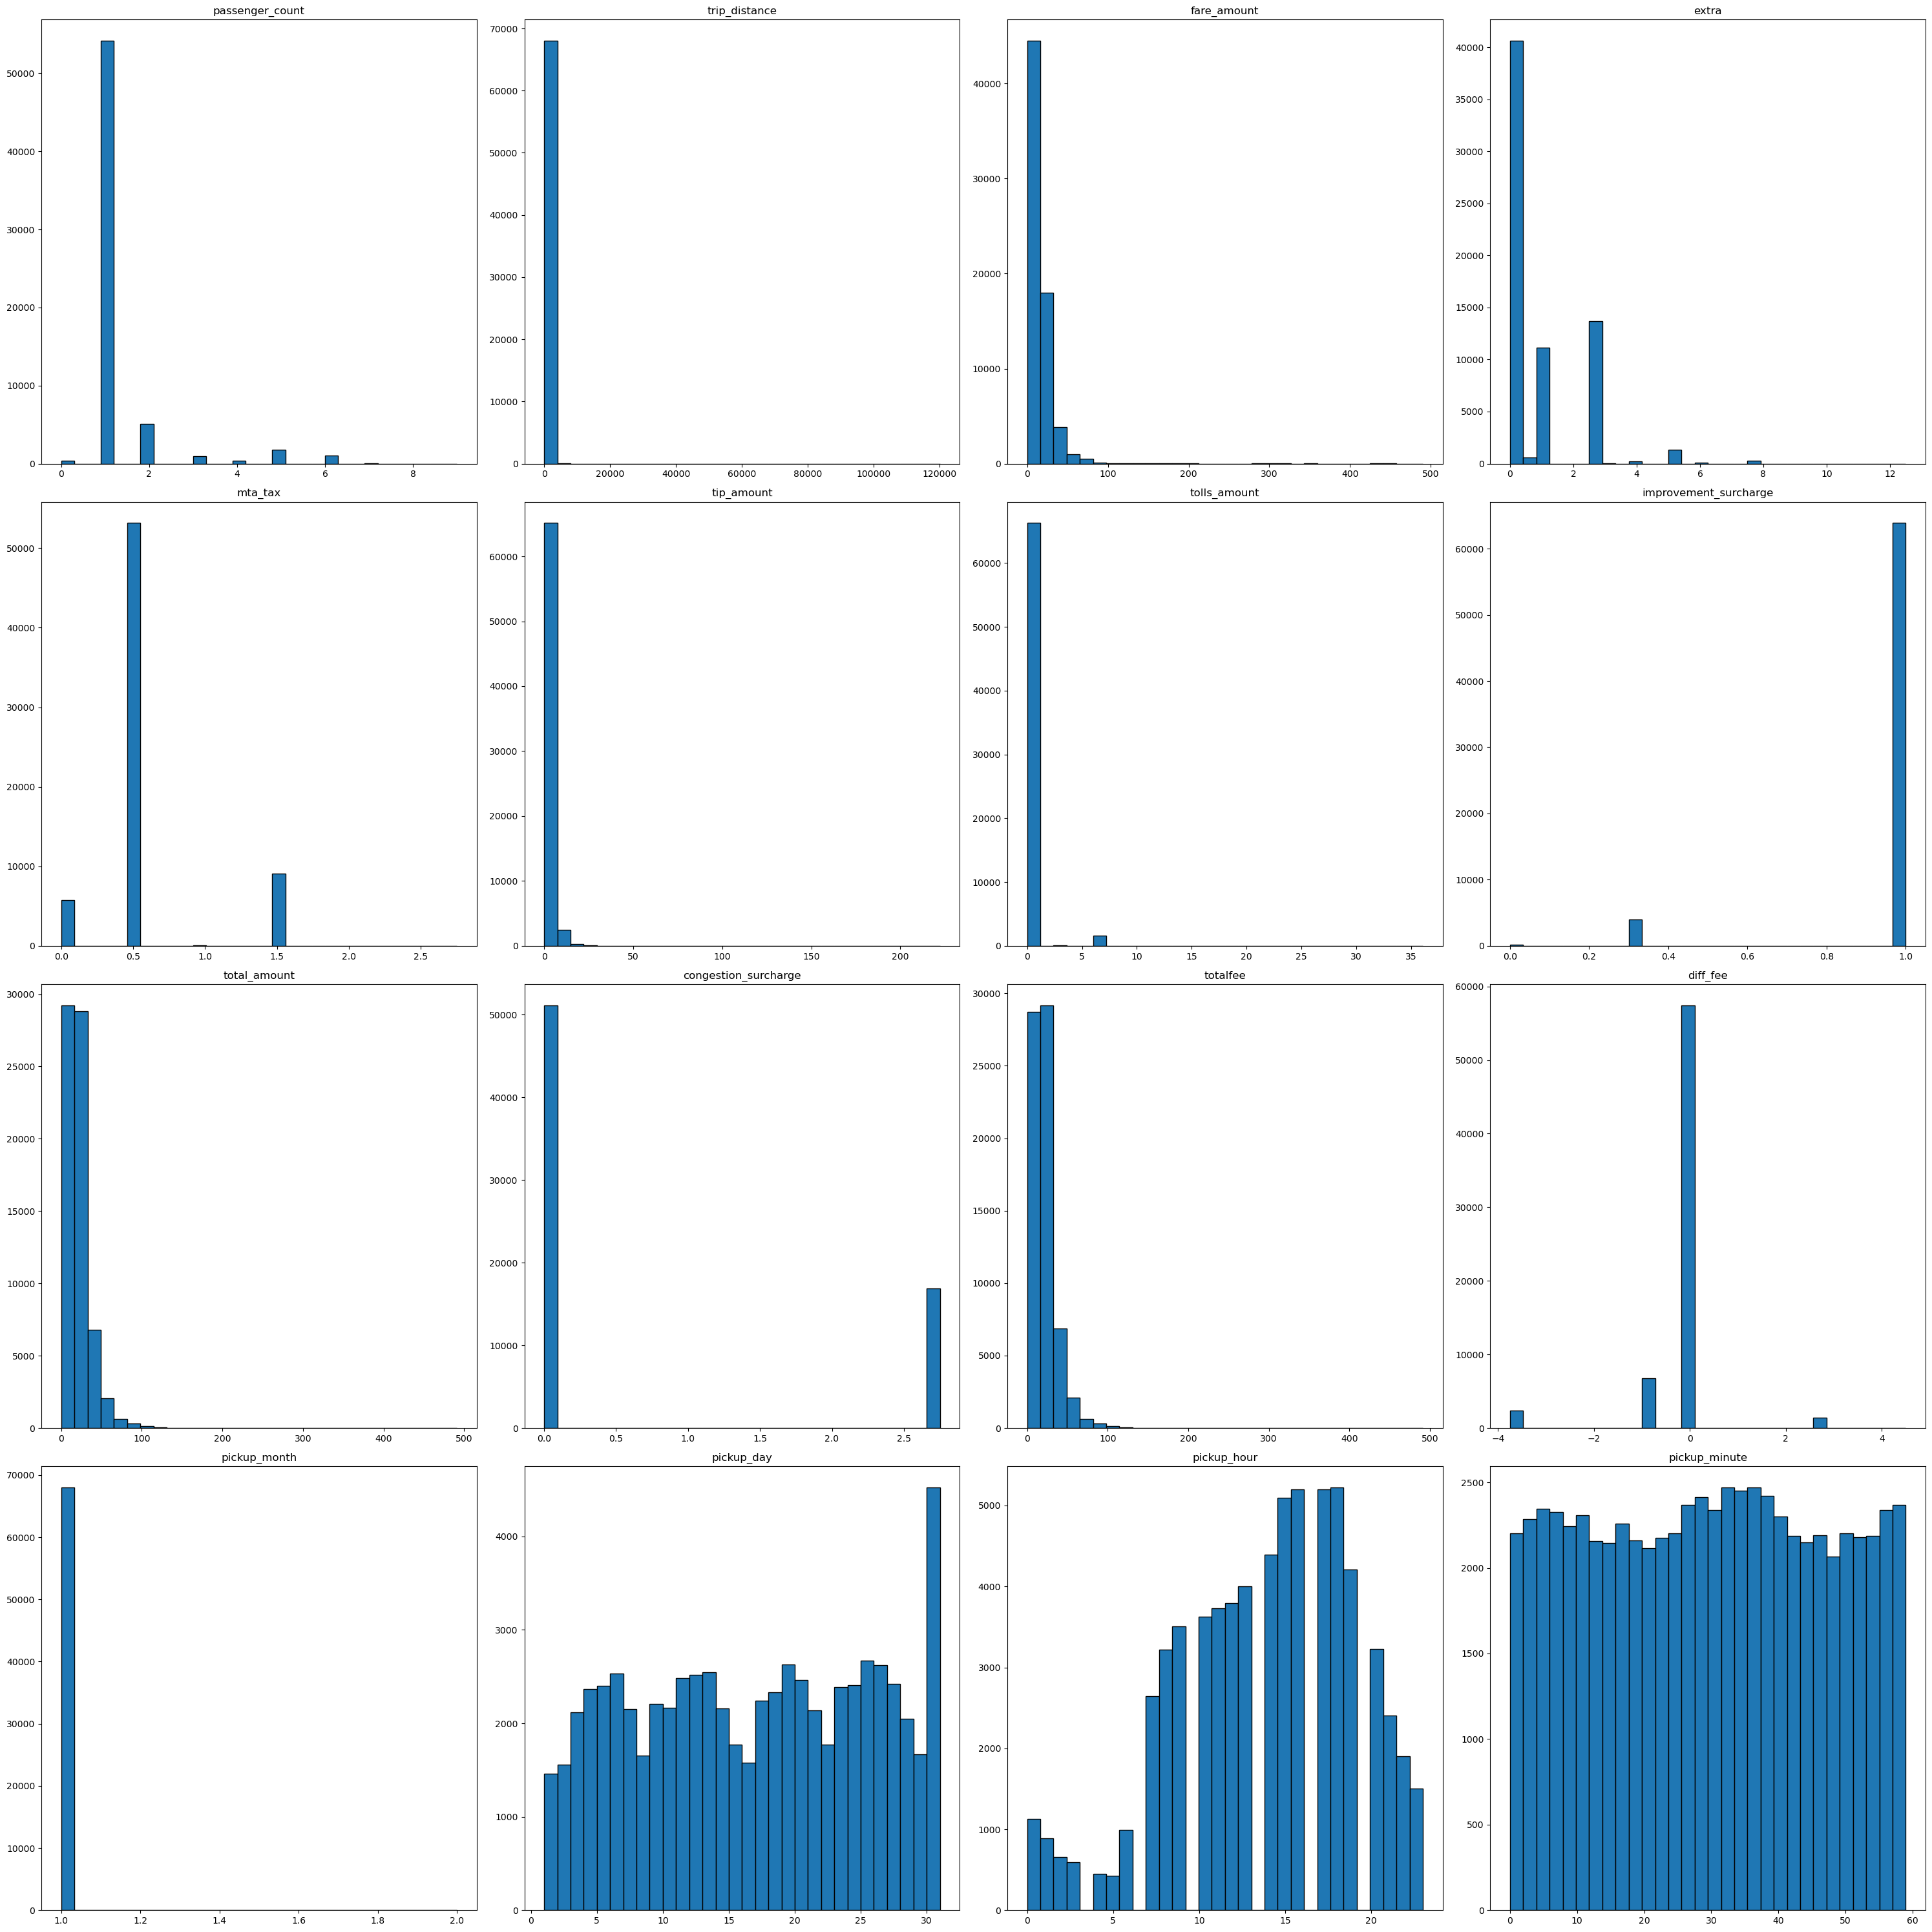

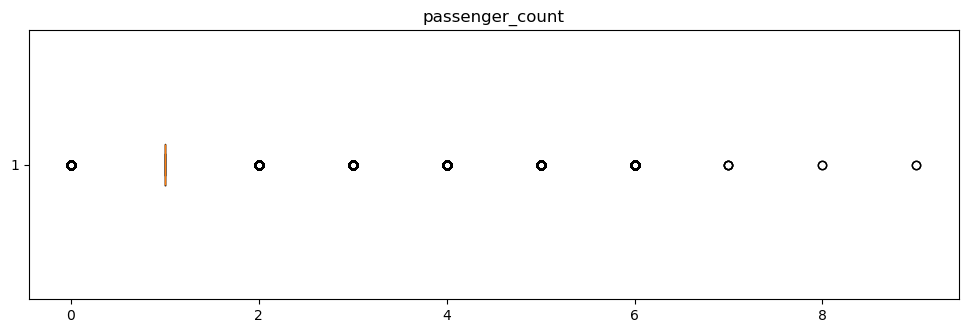

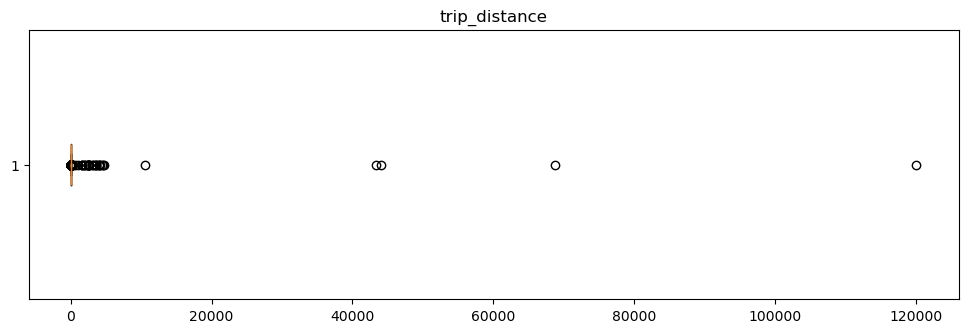

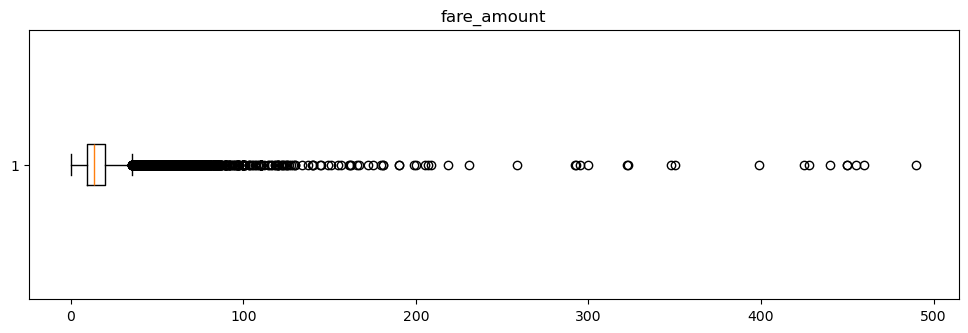

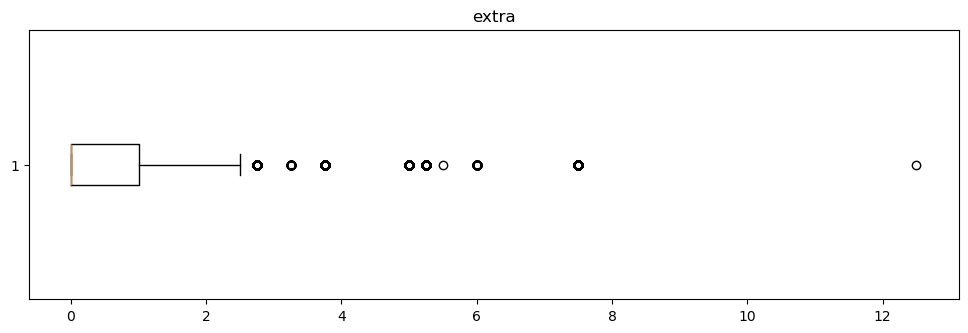

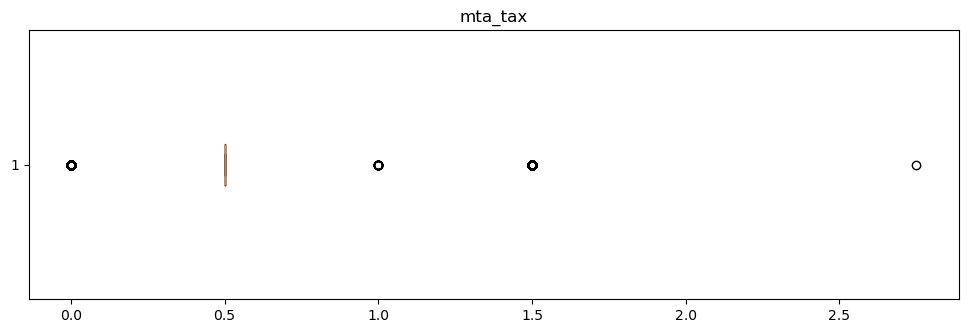

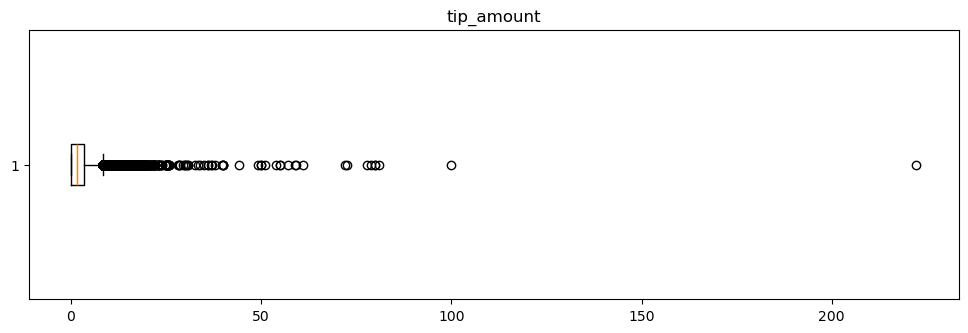

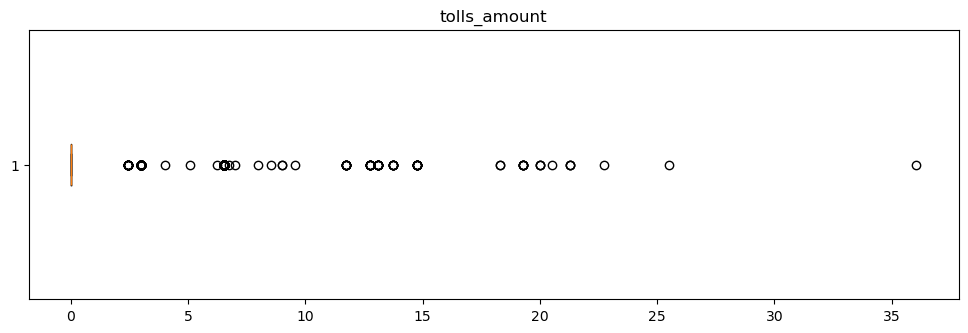

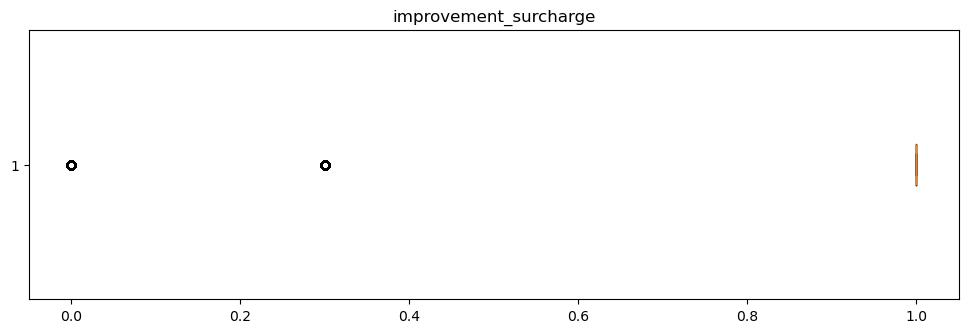

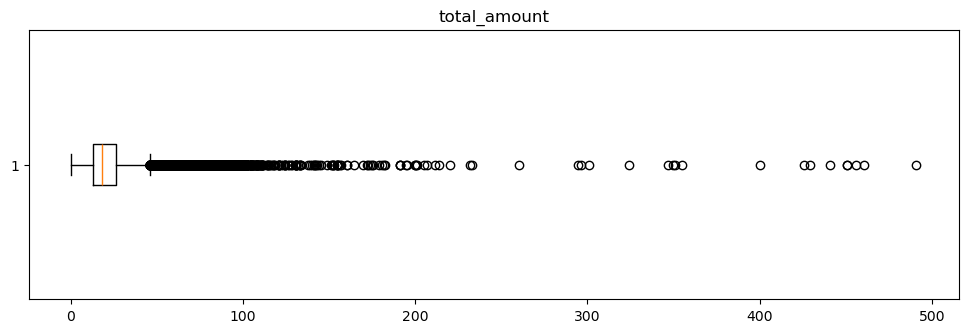

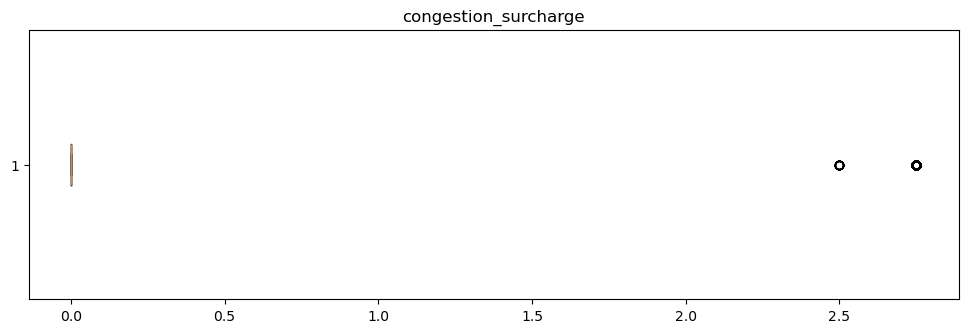

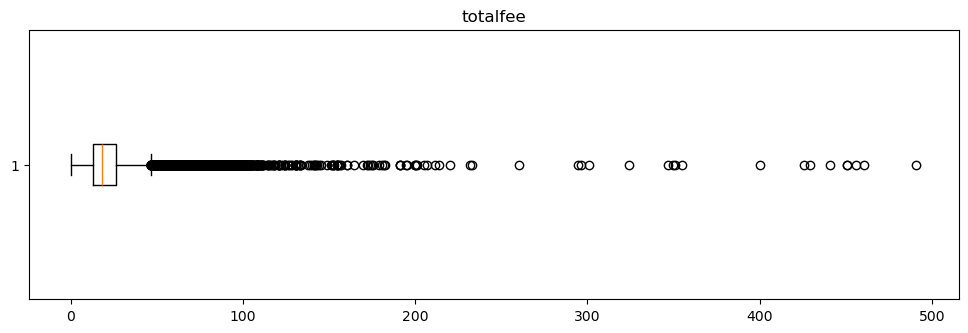

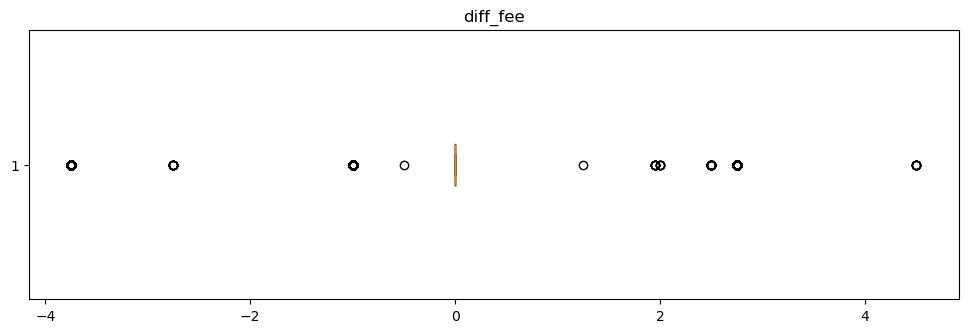

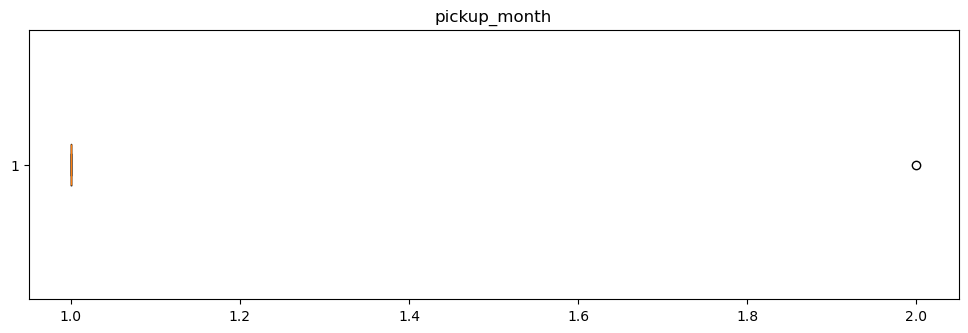

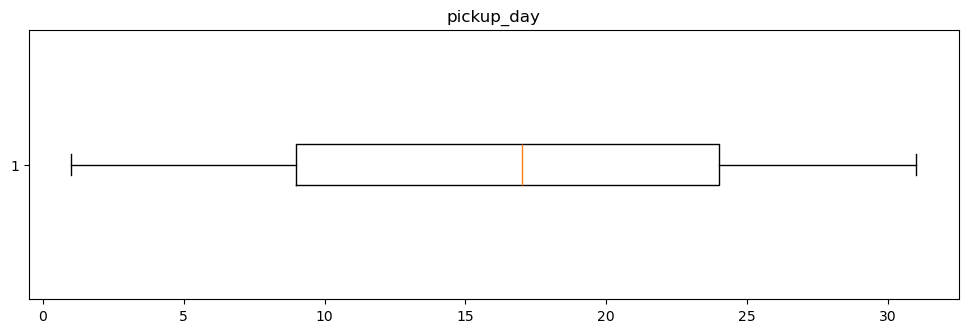

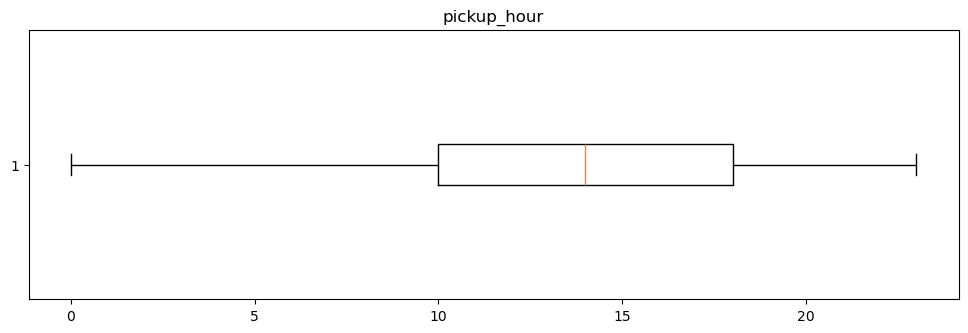

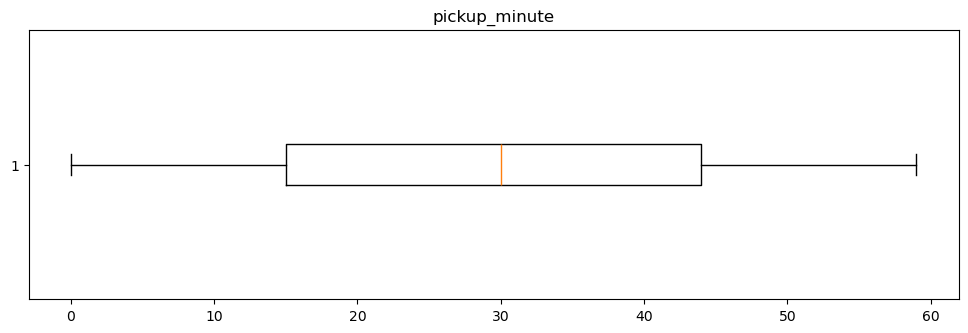

In [63]:
for col in ['VendorID','RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'trip_type','store_and_fwd_flag']:
  print(df.value_counts([col], dropna = False).reset_index(name = 'jumlah'))


num = df.select_dtypes(include='number')   # ambil yang numerik saja
ax = num.hist(bins=30, figsize=(30, 30), grid=False, edgecolor='black')
plt.tight_layout()


num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(12, 3.5))  # atur gede-nya di sini
    ax.boxplot(df[col].dropna(), vert=False, showfliers=True)
    ax.set_title(col)
    ax.grid(False)
    plt.show()


Dari visualisasi di atas diketahui beberapa hal:

- ada beberapa lokasi favorit untuk pickup dan dropoff
- kebanyakan street hail (trip type) +> berarti ada lokasi tertentu yang org sering butuh taksi
- didapati trip distance ada yang bernilai jauh sekali, ini harus dicek kemungkinan besar outliers 
- fare amount jg didapati ada yang bernilai tinggi sekali

sehingga diduga ada hari2 tertentu dan jam2 tertentu yg terdapat banyak panggilan naik taksi

### Dibawah akan dilakukan data preparation lagi seperti mengisi missing values pada kolom passenger count dan handling outliers yang masih ada, serta feature engineering

In [65]:
df['pickup_month'].value_counts()

pickup_month
1    68028
2        1
Name: count, dtype: int64

In [66]:
df[df['pickup_month'] == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,...,1.0,2.0,0.0,33.96,0.0,2,1,Wednesday,3,10


In [67]:
df[df['passenger_count'].isna()]['pickup_day'].value_counts()

pickup_day
19    203
13    185
20    181
1     175
25    172
5     170
27    166
12    157
23    156
6     155
14    151
11    147
18    144
3     139
21    138
30    136
24    135
28    134
17    132
26    131
31    129
10    123
22    119
4     119
7     115
16    112
9     109
2     100
29    100
15     99
8      87
Name: count, dtype: int64

In [68]:
df[df['passenger_count'].isna()]['pickup_weekday_name'].value_counts()

pickup_weekday_name
Friday       687
Thursday     661
Tuesday      658
Monday       613
Wednesday    582
Sunday       580
Saturday     538
Name: count, dtype: int64

In [69]:
df[df['passenger_count'].isna()]['trip_distance'].describe()

count      4319.000000
mean         90.029231
std        2323.818131
min           0.000000
25%           1.780000
50%           3.360000
75%           6.110000
max      120098.840000
Name: trip_distance, dtype: float64

In [71]:
df = df[df['pickup_month'] == 1]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,1.0,2.75,24.18,0.00,1,1,Sunday,0,26
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,1.0,0.00,15.84,0.00,1,1,Sunday,0,51
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,1.0,1.0,0.00,11.64,0.00,1,1,Sunday,0,35
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,1.0,0.00,11.20,-1.00,1,1,Sunday,0,13
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,1.0,0.00,9.00,-1.00,1,1,Sunday,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,NaN,4070.82,15.70,...,unknown,unknown,0.00,16.70,0.00,1,31,Tuesday,22,29
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,NaN,2.14,4.41,...,unknown,unknown,0.00,5.41,0.00,1,31,Tuesday,22,40
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,NaN,3.44,16.53,...,unknown,unknown,0.00,21.04,0.00,1,31,Tuesday,23,46
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,NaN,3.03,14.98,...,unknown,unknown,0.00,19.18,0.00,1,31,Tuesday,23,1


In [72]:
round(df.groupby(['trip_distance','pickup_hour'])['passenger_count'].mean(),0)

trip_distance  pickup_hour
0.00           0              1.0
               1              1.0
               2              1.0
               3              1.0
               4              1.0
                             ... 
10480.36       5              NaN
43392.12       7              NaN
44003.31       9              NaN
68796.82       18             NaN
120098.84      6              NaN
Name: passenger_count, Length: 16059, dtype: float64

In [73]:
# isi passenger count dengan berdasarkan jam biasa mrk panggil taksi dan panjang tripnya
dist_edges  = [-np.inf, 0, 1, 3, 7, 15, np.inf]
dist_labels = ['<=0', '0–1', '1–3', '3–7', '7–15', '>15']

df['trip_distance_cat'] = pd.cut(
    pd.to_numeric(df['trip_distance'], errors='coerce'),
    bins=dist_edges,
    labels=dist_labels,
    include_lowest=True,
    ordered=True
).astype('category')

In [74]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,24.18,0.0,1,1,Sunday,0,26,1–3
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,15.84,0.0,1,1,Sunday,0,51,1–3
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,11.64,0.0,1,1,Sunday,0,35,<=0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,11.20,-1.0,1,1,Sunday,0,13,1–3
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,9.00,-1.0,1,1,Sunday,0,33,1–3


In [75]:
df[df['trip_distance'] > 20]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat
476,2,2023-01-01 11:10:46,2023-01-01 11:52:44,N,2.0,41,132,1.0,20.55,70.00,...,1.0,0.0,97.56,0.00,1,1,Sunday,11,10,>15
577,2,2023-01-01 13:45:29,2023-01-01 14:25:06,N,1.0,66,132,2.0,27.61,101.00,...,1.0,0.0,111.38,0.00,1,1,Sunday,13,45,>15
691,2,2023-01-01 14:59:35,2023-01-01 15:57:23,N,1.0,55,138,1.0,23.58,94.00,...,1.0,0.0,120.60,0.00,1,1,Sunday,14,59,>15
1445,2,2023-01-02 08:57:41,2023-01-02 09:39:53,N,3.0,166,1,3.0,26.94,121.70,...,1.0,0.0,169.69,0.00,1,2,Monday,8,57,>15
1557,2,2023-01-02 10:38:43,2023-01-02 11:04:43,N,1.0,65,132,1.0,20.56,75.80,...,1.0,0.0,92.76,0.00,1,2,Monday,10,38,>15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67940,2,2023-01-29 21:41:00,2023-01-29 22:13:00,unknown,unknown,175,265,NaN,21.30,82.19,...,unknown,0.0,107.69,0.00,1,29,Sunday,21,41,>15
67973,2,2023-01-30 08:02:00,2023-01-30 08:39:00,unknown,unknown,42,162,NaN,2388.79,26.68,...,unknown,0.0,27.68,2.75,1,30,Monday,8,2,>15
68038,2,2023-01-30 15:39:00,2023-01-30 16:35:00,unknown,unknown,29,141,NaN,20.29,68.19,...,unknown,0.0,89.87,2.75,1,30,Monday,15,39,>15
68184,2,2023-01-31 17:48:00,2023-01-31 17:53:00,unknown,unknown,193,193,NaN,3008.62,13.30,...,unknown,0.0,17.16,0.00,1,31,Tuesday,17,48,>15


In [76]:
df[df['trip_distance'] <0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat


In [77]:
def hour_to_tod(h):
    if pd.isna(h):
        return np.nan
    h = int(h)
    if 5 <= h <= 10:  return 'pagi'
    if 11 <= h <= 14: return 'siang'
    if 15 <= h <= 18: return 'sore'
    return 'malam'  # 19–23 or 00–04

df['pickup_tod4'] = df['pickup_hour'].apply(hour_to_tod)
df['pickup_tod4'] = pd.Categorical(
    df['pickup_tod4'],
    categories=['pagi','siang','sore','malam'],
    ordered=True
)

In [78]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2.75,24.18,0.0,1,1,Sunday,0,26,1–3,malam
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.00,15.84,0.0,1,1,Sunday,0,51,1–3,malam
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.00,11.64,0.0,1,1,Sunday,0,35,<=0,malam
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.00,11.20,-1.0,1,1,Sunday,0,13,1–3,malam
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,9.00,-1.0,1,1,Sunday,0,33,1–3,malam


In [79]:
mapping_df = (
    df.groupby(['trip_distance_cat','pickup_tod4'])['passenger_count']
      .median()
      .reset_index(name='pc_median')
)

# (opsional) lihat tabel mappingnya
print(mapping_df.head(30))

   trip_distance_cat pickup_tod4  pc_median
0                <=0        pagi        1.0
1                <=0       siang        1.0
2                <=0        sore        1.0
3                <=0       malam        1.0
4                0–1        pagi        1.0
5                0–1       siang        1.0
6                0–1        sore        1.0
7                0–1       malam        1.0
8                1–3        pagi        1.0
9                1–3       siang        1.0
10               1–3        sore        1.0
11               1–3       malam        1.0
12               3–7        pagi        1.0
13               3–7       siang        1.0
14               3–7        sore        1.0
15               3–7       malam        1.0
16              7–15        pagi        1.0
17              7–15       siang        1.0
18              7–15        sore        1.0
19              7–15       malam        1.0
20               >15        pagi        1.0
21               >15       siang

In [80]:
med_map = { (row['trip_distance_cat'], row['pickup_tod4']) : row['pc_median']
            for _, row in mapping_df.iterrows() }

# 3) Isi hanya baris yang NA dengan median sesuai kategorinya
mask_na = df['passenger_count'].isna()
keys = pd.Series(list(zip(df.loc[mask_na, 'trip_distance_cat'],
                          df.loc[mask_na, 'pickup_tod4'])),
                 index=df.loc[mask_na].index)

df.loc[mask_na, 'passenger_count'] = keys.map(med_map)

In [81]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
totalfee                 0
diff_fee                 0
pickup_month             0
pickup_day               0
pickup_weekday_name      0
pickup_hour              0
pickup_minute            0
trip_distance_cat        0
pickup_tod4              0
dtype: int64

In [82]:
df['trip_duration_min'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60.0

In [83]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,totalfee,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,0.0,1,1,Sunday,0,26,1–3,malam,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,0.0,1,1,Sunday,0,51,1–3,malam,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,0.0,1,1,Sunday,0,35,<=0,malam,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,11.20,-1.0,1,1,Sunday,0,13,1–3,malam,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,9.00,-1.0,1,1,Sunday,0,33,1–3,malam,5.966667


In [84]:
hours = df['trip_duration_min'] / 60.0
df['speed_mph'] = np.where((hours > 0) & df['trip_distance'].notna(),
                                   df['trip_distance'] / hours, np.nan)

In [85]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1,1,Sunday,0,26,1–3,malam,11.016667,14.051437
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1,1,Sunday,0,51,1–3,malam,6.766667,16.049261
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1,1,Sunday,0,35,<=0,malam,6.333333,0.000000
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,-1.0,1,1,Sunday,0,13,1–3,malam,5.816667,13.409742
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,-1.0,1,1,Sunday,0,33,1–3,malam,5.966667,11.061453


In [86]:
df['trip_distance'].describe()

count     68028.000000
mean          8.135370
std         585.892283
min           0.000000
25%           1.120000
50%           1.850000
75%           3.220000
max      120098.840000
Name: trip_distance, dtype: float64

In [87]:
q1, q2, q3 = df['trip_distance'].quantile([0.25, 0.50, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
q0, q4 = df['trip_distance'].min(), df['trip_distance'].max()

out_low  = df['trip_distance'][df['trip_distance'] < low]
out_high = df['trip_distance'][df['trip_distance'] > high]

In [88]:
print(low, high)

-2.0300000000000002 6.370000000000001


In [89]:
print(q0, q1, q2, q3, q4)
print(out_low.head())
print(out_high.head())

0.0 1.12 1.85 3.22 120098.84
Series([], Name: trip_distance, dtype: float64)
12     7.08
15    11.30
17     8.28
31    10.44
32     6.78
Name: trip_distance, dtype: float64


In [90]:
df[df['trip_distance'] > 10000][['trip_distance','total_amount']]

,trip_distance,total_amount
64609,43392.12,15.62
65194,120098.84,52.57
65846,10480.36,25.21
66581,44003.31,27.13
67926,68796.82,34.38


In [91]:
row_pos = df.index.get_loc(64609)                         # label → posisi int
col_pos = df.columns.get_loc('trip_distance')             # kolom label → posisi int
df.iloc[row_pos, col_pos] = 4.339212

In [92]:
df[df['trip_distance'] > 10000][['trip_distance','total_amount']]

,trip_distance,total_amount
65194,120098.84,52.57
65846,10480.36,25.21
66581,44003.31,27.13
67926,68796.82,34.38


In [93]:
row_pos = df.index.get_loc(65194)                         # label → posisi int
col_pos = df.columns.get_loc('trip_distance')             # kolom label → posisi int
df.iloc[row_pos, col_pos] = 12.009884

In [94]:
df[df['trip_distance'] > 10000][['trip_distance','total_amount']]

,trip_distance,total_amount
65846,10480.36,25.21
66581,44003.31,27.13
67926,68796.82,34.38


In [95]:
row_pos = df.index.get_loc(65846)                         # label → posisi int
col_pos = df.columns.get_loc('trip_distance')             # kolom label → posisi int
df.iloc[row_pos, col_pos] = 1.048036

In [96]:
df[df['trip_distance'] > 10000][['trip_distance','total_amount']]

,trip_distance,total_amount
66581,44003.31,27.13
67926,68796.82,34.38


In [97]:
row_pos = df.index.get_loc(66581)                         # label → posisi int
col_pos = df.columns.get_loc('trip_distance')             # kolom label → posisi int
df.iloc[row_pos, col_pos] = 4.400331

In [98]:
df[df['trip_distance'] > 10000][['trip_distance','total_amount']]

,trip_distance,total_amount
67926,68796.82,34.38


In [99]:
row_pos = df.index.get_loc(67926)                         # label → posisi int
col_pos = df.columns.get_loc('trip_distance')             # kolom label → posisi int
df.iloc[row_pos, col_pos] = 6.879682

In [100]:
df[df['trip_distance'] > 10000][['trip_distance','total_amount']]

,trip_distance,total_amount


In [101]:
df[(df['total_amount'] >= 33)&(df['total_amount'] <= 35)&(df['trip_distance'] < 7)&(df['trip_distance']>6)][['trip_distance','total_amount']]

,trip_distance,total_amount
81,6.320000,34.85
114,6.140000,33.45
118,6.530000,33.50
574,6.500000,33.85
672,6.240000,33.75
...,...,...
67719,6.400000,34.67
67870,6.490000,33.43
67926,6.879682,34.38
68095,6.880000,34.76


In [102]:
df[(df['total_amount'] >= 26)&(df['total_amount'] <= 28)&(df['trip_distance'] < 5)&(df['trip_distance']>4)][['trip_distance','total_amount']]

,trip_distance,total_amount
130,4.62,27.85
133,4.12,26.50
143,4.29,26.50
162,4.38,26.50
287,4.58,26.76
...,...,...
67972,4.43,26.21
68051,4.20,27.23
68120,4.20,27.74
68124,4.22,26.42


In [103]:
df[(df['total_amount'] >= 24)&(df['total_amount'] <= 26)&(df['trip_distance'] < 1.2)&(df['trip_distance']>0)][['trip_distance','total_amount']]

,trip_distance,total_amount
2587,0.070000,24.84
3790,0.560000,26.00
4165,0.530000,26.00
5094,1.010000,24.40
8911,0.030000,24.00
10091,0.220000,26.00
11543,0.250000,26.00
11801,0.600000,24.00
12831,0.950000,24.50
19025,0.030000,24.33


In [104]:
df[(df['total_amount'] >= 51)&(df['total_amount'] <= 53)&(df['trip_distance'] > 10)][['trip_distance','total_amount']]

,trip_distance,total_amount
1164,11.37,51.65
1368,13.00,52.80
2910,11.32,51.40
3560,22.62,52.55
3581,10.38,51.60
...,...,...
67123,10.36,52.27
67831,11.60,51.78
67846,10.20,52.69
67937,13.63,52.46


In [105]:
df[(df['total_amount'] >= 14)&(df['total_amount'] <= 16)&(df['trip_distance'] > 4)][['trip_distance','total_amount']]

,trip_distance,total_amount
5063,4.400000,16.00
28590,5.100000,15.00
42979,4.070000,15.30
49330,9.200000,16.00
51426,5.400000,16.00
64609,4.339212,15.62
65023,10.810000,15.44
65277,2645.650000,15.82
65725,3515.740000,15.62
66911,28.650000,15.88


In [106]:
df['trip_distance'].describe()

count    68028.000000
mean         3.920300
std         62.921929
min          0.000000
25%          1.120000
50%          1.850000
75%          3.220000
max       4707.370000
Name: trip_distance, dtype: float64

In [107]:
q1, q2, q3 = df['trip_distance'].quantile([0.25, 0.50, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
q0, q4 = df['trip_distance'].min(), df['trip_distance'].max()

out_low  = df['trip_distance'][df['trip_distance'] < low]
out_high = df['trip_distance'][df['trip_distance'] > high]

In [108]:
print(q0, q1, q2, q3, q4)
print(low, high)
print(out_low.head())
print(out_high.head())

0.0 1.12 1.85 3.22 4707.37
-2.0300000000000002 6.370000000000001
Series([], Name: trip_distance, dtype: float64)
12     7.08
15    11.30
17     8.28
31    10.44
32     6.78
Name: trip_distance, dtype: float64


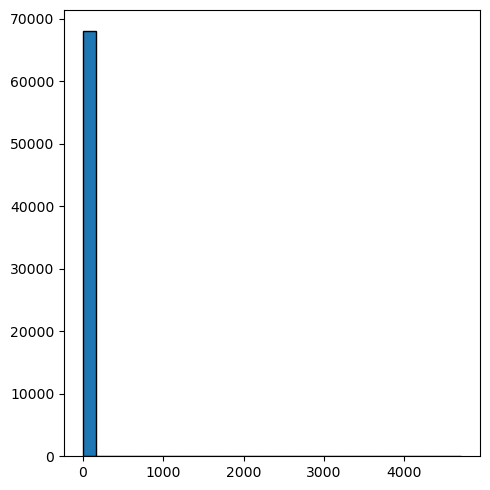

In [109]:
num2 = df['trip_distance']   # ambil yang numerik saja
ax = num2.hist(bins=30, figsize=(5, 5), grid=False, edgecolor='black')
plt.tight_layout()

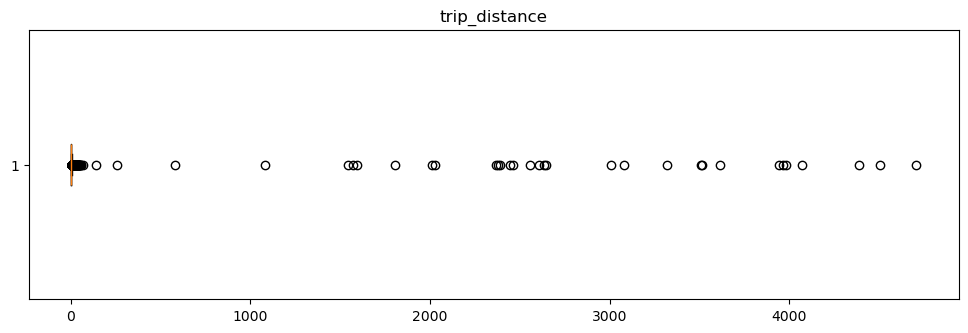

In [110]:
fig, ax = plt.subplots(figsize=(12, 3.5))  # atur gede-nya di sini
ax.boxplot(df['trip_distance'].dropna(), vert=False, showfliers=True)
ax.set_title('trip_distance')
ax.grid(False)
plt.show()

In [111]:
df[df['trip_distance']>high][['trip_distance','total_amount']]

,trip_distance,total_amount
12,7.08,38.55
15,11.30,34.50
17,8.28,54.55
31,10.44,59.52
32,6.78,75.66
...,...,...
68187,13.90,37.09
68195,9.61,44.88
68199,10.64,43.65
68201,6.92,34.64


In [112]:
df[df['trip_distance'] > 500][['total_amount','trip_distance']]

,total_amount,trip_distance
33373,43.31,1571.97
63995,37.08,579.63
64446,27.92,2555.47
64558,17.02,3077.89
64572,13.20,2606.52
64947,31.98,2446.53
64954,22.64,2027.31
65149,51.75,1082.45
65277,15.82,2645.65
65306,59.61,3965.74


In [113]:
df[(df['trip_distance'] < 0.5) & (df['trip_distance'] > 0.3)][['trip_distance','total_amount']]

,trip_distance,total_amount
95,0.47,10.79
147,0.32,31.62
171,0.47,11.00
197,0.47,8.30
284,0.37,7.60
...,...,...
67259,0.44,19.65
67591,0.41,13.19
68172,0.43,19.45
68193,0.45,16.94


nilai puluhan ribu mil jelas salah data, dan dari beberapa data di atas, terlihat kalau mereka kelebihan 10.000 semua 
karena total_amountnya wajar untuk nilai nya kalo dibagi 10000, maka semua nilai yang sangat anomali tersebut akan dibagi 10000

In [114]:
df[(df['trip_distance'] > 150)][['trip_distance','total_amount']]

,trip_distance,total_amount
33373,1571.97,43.31
63995,579.63,37.08
64446,2555.47,27.92
64558,3077.89,17.02
64572,2606.52,13.20
64947,2446.53,31.98
64954,2027.31,22.64
65149,1082.45,51.75
65277,2645.65,15.82
65306,3965.74,59.61


In [115]:
df[(df['trip_distance'] < 150)&(df['trip_distance'] > 100)][['trip_distance','total_amount']]

,trip_distance,total_amount
64695,137.95,49.94


In [116]:
mask = df['trip_distance'] > 150
df.loc[mask, 'trip_distance'] = df.loc[mask, 'trip_distance'] / 10000

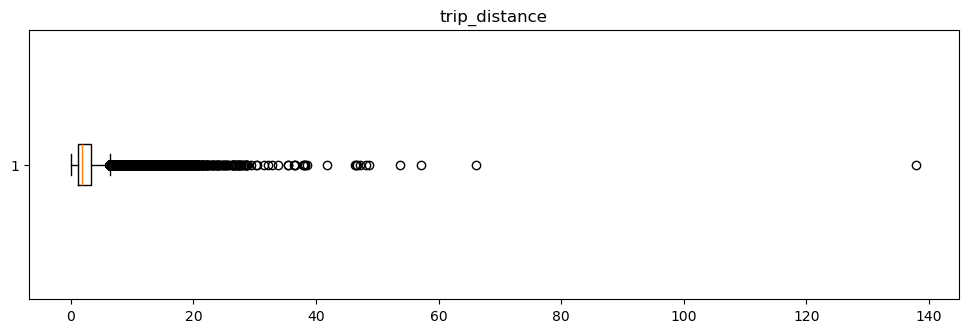

In [117]:
fig, ax = plt.subplots(figsize=(12, 3.5))  # atur gede-nya di sini
ax.boxplot(df['trip_distance'].dropna(), vert=False, showfliers=True)
ax.set_title('trip_distance')
ax.grid(False)
plt.show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68028 entries, 0 to 68210
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68028 non-null  object        
 1   lpep_pickup_datetime   68028 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68028 non-null  datetime64[ns]
 3   store_and_fwd_flag     68028 non-null  object        
 4   RatecodeID             68028 non-null  object        
 5   PULocationID           68028 non-null  object        
 6   DOLocationID           68028 non-null  object        
 7   passenger_count        68028 non-null  float64       
 8   trip_distance          68028 non-null  float64       
 9   fare_amount            68028 non-null  float64       
 10  extra                  68028 non-null  float64       
 11  mta_tax                68028 non-null  float64       
 12  tip_amount             68028 non-null  float64       
 13  tolls_

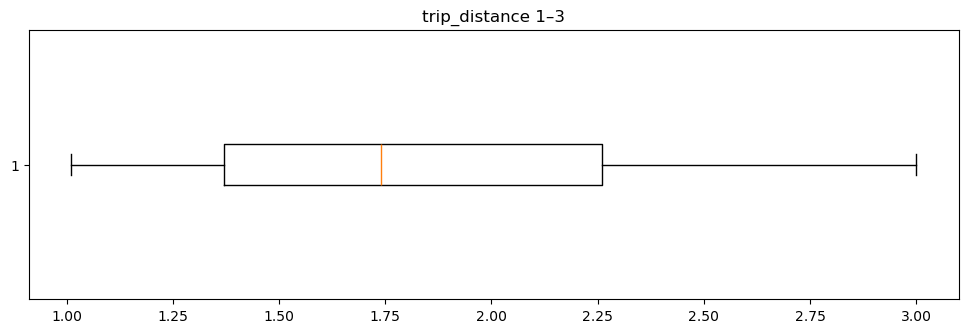

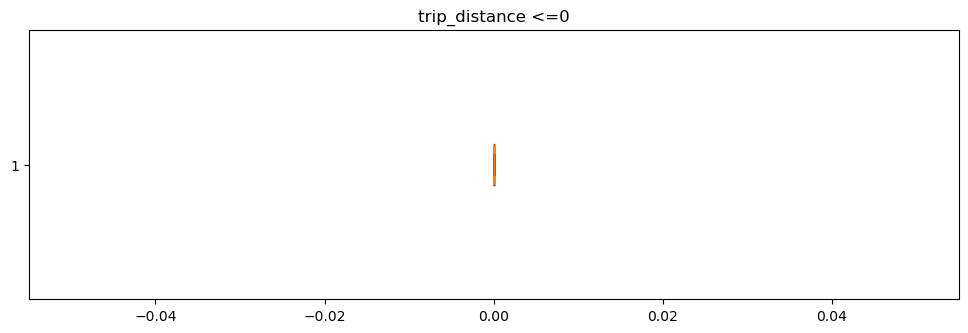

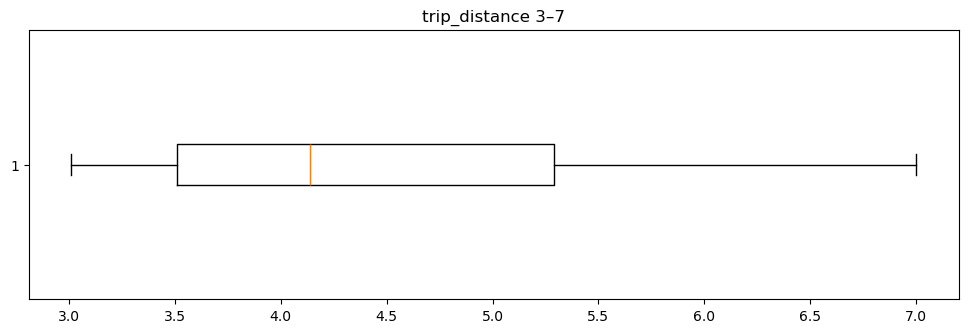

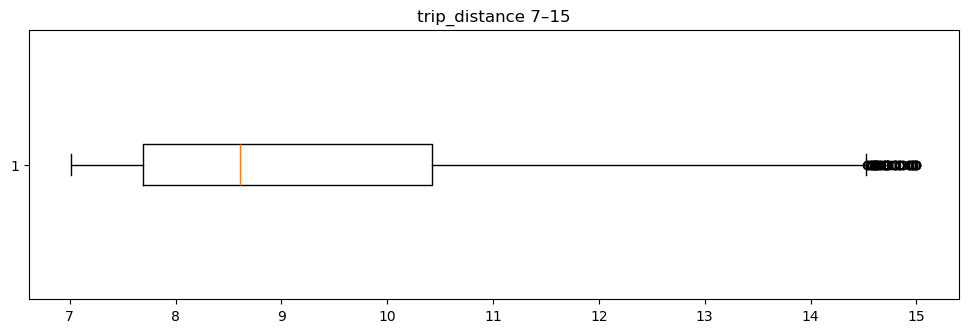

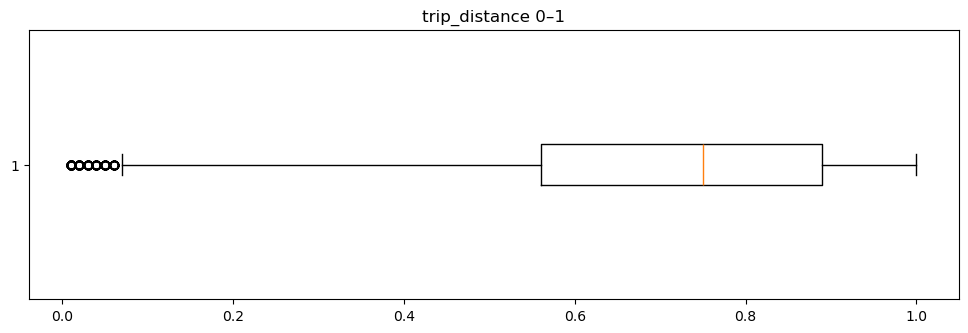

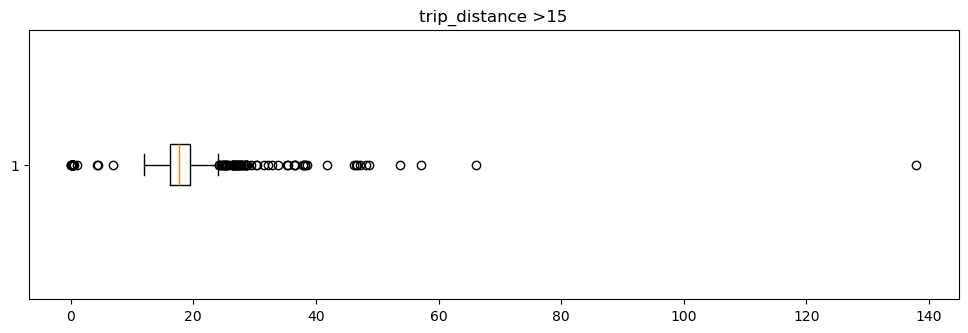

In [119]:
for jarak in df['trip_distance_cat'].unique() : 
    df_2 = df[df['trip_distance_cat'] == jarak].copy()
    fig, ax = plt.subplots(figsize=(12, 3.5))  # atur gede-nya di sini
    ax.boxplot(df_2['trip_distance'].dropna(), vert=False, showfliers=True)
    ax.set_title(f'trip_distance {jarak}')
    ax.grid(False)
    
    plt.show()

In [120]:
df[df['trip_distance_cat'] == '>15']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
97,2,2023-01-01 01:42:30,2023-01-01 02:26:39,N,1.0,179,226,1.0,15.390000,66.00,...,0.0,1,1,Sunday,1,42,>15,malam,44.150000,20.915062
312,2,2023-01-01 07:56:06,2023-01-01 08:22:01,N,1.0,37,241,1.0,15.520000,58.30,...,0.0,1,1,Sunday,7,56,>15,pagi,25.916667,35.930547
476,2,2023-01-01 11:10:46,2023-01-01 11:52:44,N,2.0,41,132,1.0,20.550000,70.00,...,0.0,1,1,Sunday,11,10,>15,siang,41.966667,29.380461
556,2,2023-01-01 13:07:46,2023-01-01 19:45:18,N,1.0,223,8,1.0,16.000000,292.80,...,0.0,1,1,Sunday,13,7,>15,siang,397.533333,2.414892
577,2,2023-01-01 13:45:29,2023-01-01 14:25:06,N,1.0,66,132,2.0,27.610000,101.00,...,0.0,1,1,Sunday,13,45,>15,siang,39.616667,41.815734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68123,2,2023-01-31 10:27:00,2023-01-31 11:21:00,unknown,unknown,41,132,1.0,18.220000,77.00,...,0.0,1,31,Tuesday,10,27,>15,pagi,54.000000,20.244444
68180,2,2023-01-31 17:11:00,2023-01-31 17:48:00,unknown,unknown,244,265,1.0,19.080000,80.82,...,0.0,1,31,Tuesday,17,11,>15,sore,37.000000,30.940541
68182,2,2023-01-31 17:34:00,2023-01-31 18:32:00,unknown,unknown,166,132,1.0,18.620000,77.00,...,0.0,1,31,Tuesday,17,34,>15,sore,58.000000,19.262069
68184,2,2023-01-31 17:48:00,2023-01-31 17:53:00,unknown,unknown,193,193,1.0,0.300862,13.30,...,0.0,1,31,Tuesday,17,48,>15,sore,5.000000,36103.440000


In [121]:
# semua median passenger count dalam kategori trip distance dan pickup hourt tod4 sama semua bernilai 1. Jadi gak usah diapa2in lagi
# balik lagi ke pembuatan kolom trip_distance_cat untuk renew nilai karena trip_distance habis direnew juga

In [122]:
# isi passenger count dengan berdasarkan jam biasa mrk panggil taksi dan panjang tripnya
dist_edges  = [-np.inf, 0, 1, 3, 7, 15, np.inf]
dist_labels = ['<=0', '0–1', '1–3', '3–7', '7–15', '>15']

df['trip_distance_cat'] = pd.cut(
     pd.to_numeric(df['trip_distance'], errors='coerce'),
     bins=dist_edges,
     labels=dist_labels,
     include_lowest=True,
     ordered=True
 ).astype('category')

df['trip_duration_min'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60.0

hours = df['trip_duration_min'] / 60.0
df['speed_mph'] = np.where((hours > 0) & df['trip_distance'].notna(),
                                   df['trip_distance'] / hours, np.nan)

In [123]:
# habis itu berarti tes outlier trip_duration min 
# dan kalo udah berarti masuk ke pertanyaan2

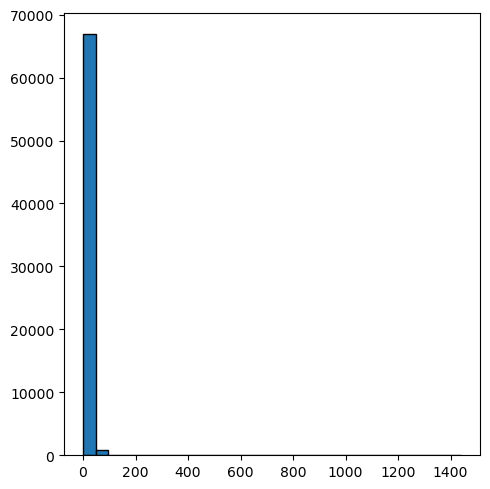

In [124]:
num2 = df['trip_duration_min']   # ambil yang numerik saja
ax = num2.hist(bins=30, figsize=(5, 5), grid=False, edgecolor='black')
plt.tight_layout()

In [125]:
df[df['trip_duration_min'] > 200]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
49,2,2023-01-01 00:23:04,2023-01-01 23:18:32,N,1.0,255,48,1.0,8.55,47.8,...,0.0,1,1,Sunday,0,23,7–15,malam,1375.466667,0.372964
108,2,2023-01-01 01:53:59,2023-01-02 00:00:00,N,1.0,260,223,1.0,2.64,14.9,...,0.0,1,1,Sunday,1,53,1–3,malam,1326.016667,0.119456
118,2,2023-01-01 01:25:46,2023-01-02 00:29:15,N,1.0,129,37,1.0,6.53,31.0,...,0.0,1,1,Sunday,1,25,3–7,malam,1383.483333,0.283198
207,2,2023-01-01 03:12:42,2023-01-02 02:03:43,N,5.0,129,129,1.0,0.72,20.0,...,0.0,1,1,Sunday,3,12,0–1,malam,1371.016667,0.031509
262,2,2023-01-01 04:03:36,2023-01-02 03:31:50,N,1.0,65,37,5.0,3.61,20.5,...,0.0,1,1,Sunday,4,3,3–7,malam,1408.233333,0.153810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,N,1.0,244,43,3.0,5.74,31.0,...,0.0,1,31,Tuesday,13,57,3–7,siang,1251.566667,0.275175
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,N,1.0,92,64,2.0,9.15,39.4,...,0.0,1,31,Tuesday,15,21,7–15,sore,518.216667,1.059402
63105,2,2023-01-31 17:45:46,2023-02-01 17:27:05,N,1.0,43,151,1.0,0.75,5.8,...,0.0,1,31,Tuesday,17,45,0–1,sore,1421.316667,0.031661
63279,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1.0,82,82,1.0,1.46,10.7,...,0.0,1,31,Tuesday,18,22,1–3,sore,337.600000,0.259479


In [126]:
df[df['trip_duration_min'] > 200]['trip_duration_min'].describe()

count     262.000000
mean     1139.502417
std       411.101077
min       211.983333
25%       839.687500
50%      1388.675000
75%      1410.512500
max      1439.883333
Name: trip_duration_min, dtype: float64

* ada data yang lebih dari 600 menit (10 jam) 

In [127]:
len(df[df['trip_duration_min'] > 200])/len(df)

0.0038513553242782383

In [128]:
df_clean = df.copy()

In [129]:
df_clean = df_clean[df_clean['trip_duration_min'] <= 300]
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,0.00,1,1,Sunday,0,26,1–3,malam,11.016667,14.051437
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,0.00,1,1,Sunday,0,51,1–3,malam,6.766667,16.049261
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.000000,7.20,...,0.00,1,1,Sunday,0,35,<=0,malam,6.333333,0.000000
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,-1.00,1,1,Sunday,0,13,1–3,malam,5.816667,13.409742
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,-1.00,1,1,Sunday,0,33,1–3,malam,5.966667,11.061453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,0.00,1,31,Tuesday,22,29,0–1,malam,13.000000,1.878840
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,0.00,1,31,Tuesday,22,40,1–3,malam,8.000000,16.050000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,0.00,1,31,Tuesday,23,46,3–7,malam,16.000000,12.900000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,0.00,1,31,Tuesday,23,1,3–7,malam,18.000000,10.100000


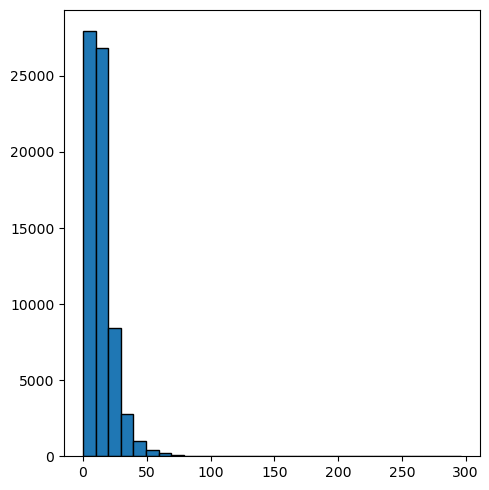

In [130]:
num2 = df_clean['trip_duration_min']   # ambil yang numerik saja
ax = num2.hist(bins=30, figsize=(5, 5), grid=False, edgecolor='black')
plt.tight_layout()

In [131]:
df_clean['trip_duration_min'].describe()

count    67778.000000
mean        13.831143
std         10.834151
min          0.000000
25%          7.233333
50%         11.383333
75%         17.400000
max        296.300000
Name: trip_duration_min, dtype: float64

In [132]:
df_clean[df_clean['trip_duration_min'] == 296.3]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
28029,2,2023-01-14 19:03:42,2023-01-15,N,1.0,97,33,1.0,1.23,10.0,...,0.0,1,14,Saturday,19,3,1–3,malam,296.3,0.249072


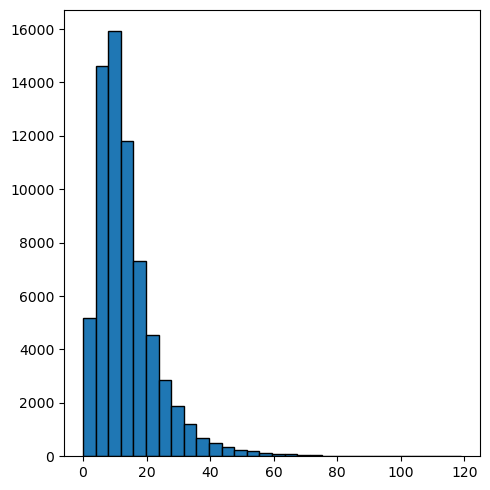

In [133]:
num3 = df_clean[df_clean['trip_duration_min']<120]['trip_duration_min']  # ambil yang numerik saja
ax = num3.hist(bins=30, figsize=(5, 5), grid=False, edgecolor='black')
plt.tight_layout()

In [134]:
df_clean[df_clean['trip_duration_min']<120]['trip_duration_min'].describe()

count    67749.000000
mean        13.756799
std         10.154058
min          0.000000
25%          7.216667
50%         11.383333
75%         17.383333
max        118.966667
Name: trip_duration_min, dtype: float64

In [135]:
len(df_clean[df_clean['trip_duration_min']>=120])/len(df_clean)

0.0004278674496149193

In [136]:
df_clean = df_clean[df_clean['trip_duration_min']<=120]
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,0.00,1,1,Sunday,0,26,1–3,malam,11.016667,14.051437
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,0.00,1,1,Sunday,0,51,1–3,malam,6.766667,16.049261
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.000000,7.20,...,0.00,1,1,Sunday,0,35,<=0,malam,6.333333,0.000000
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,-1.00,1,1,Sunday,0,13,1–3,malam,5.816667,13.409742
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,-1.00,1,1,Sunday,0,33,1–3,malam,5.966667,11.061453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,0.00,1,31,Tuesday,22,29,0–1,malam,13.000000,1.878840
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,0.00,1,31,Tuesday,22,40,1–3,malam,8.000000,16.050000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,0.00,1,31,Tuesday,23,46,3–7,malam,16.000000,12.900000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,0.00,1,31,Tuesday,23,1,3–7,malam,18.000000,10.100000


In [137]:
df_clean.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
totalfee                  0
diff_fee                  0
pickup_month              0
pickup_day                0
pickup_weekday_name       0
pickup_hour               0
pickup_minute             0
trip_distance_cat         0
pickup_tod4               0
trip_duration_min         0
speed_mph                61
dtype: int64

In [138]:
df_clean[df_clean['speed_mph'].isna()]['trip_duration_min'].unique()

array([0.])

In [139]:
df_clean[df_clean['speed_mph'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,diff_fee,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph
1246,2,2023-01-01 22:14:04,2023-01-01 22:14:04,N,1.0,226,264,1.0,0.0,3.00,...,0.0,1,1,Sunday,22,14,<=0,malam,0.0,NaN
2015,1,2023-01-02 15:17:46,2023-01-02 15:17:46,Y,1.0,3,264,2.0,0.0,24.00,...,-1.0,1,2,Monday,15,17,<=0,sore,0.0,NaN
2088,2,2023-01-02 15:02:08,2023-01-02 15:02:08,N,1.0,264,264,1.0,0.0,3.00,...,0.0,1,2,Monday,15,2,<=0,sore,0.0,NaN
2346,1,2023-01-02 18:38:48,2023-01-02 18:38:48,Y,1.0,145,264,1.0,0.0,3.70,...,-1.0,1,2,Monday,18,38,<=0,sore,0.0,NaN
2707,2,2023-01-02 22:28:26,2023-01-02 22:28:26,N,5.0,255,264,2.0,0.0,40.00,...,0.0,1,2,Monday,22,28,<=0,malam,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58900,2,2023-01-29 15:27:30,2023-01-29 15:27:30,N,1.0,42,264,1.0,0.0,3.00,...,0.0,1,29,Sunday,15,27,<=0,sore,0.0,NaN
61520,2,2023-01-30 20:39:10,2023-01-30 20:39:10,N,5.0,63,264,1.0,0.0,25.00,...,0.0,1,30,Monday,20,39,<=0,malam,0.0,NaN
61563,1,2023-01-30 21:41:00,2023-01-30 21:41:00,Y,1.0,210,264,1.0,0.0,11.50,...,-1.0,1,30,Monday,21,41,<=0,malam,0.0,NaN
65611,2,2023-01-13 16:24:00,2023-01-13 16:24:00,unknown,unknown,74,74,1.0,0.0,16.03,...,0.0,1,13,Friday,16,24,<=0,sore,0.0,NaN


terdapat ada baris dengan waktu berjalannya taxi hanya 0 menit, maka baris-baris tersebut akan dihapus

In [140]:
df_clean = df_clean[df_clean['speed_mph']>0]

In [141]:
df_clean.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
totalfee                 0
diff_fee                 0
pickup_month             0
pickup_day               0
pickup_weekday_name      0
pickup_hour              0
pickup_minute            0
trip_distance_cat        0
pickup_tod4              0
trip_duration_min        0
speed_mph                0
dtype: int64

In [142]:
df_clean.shape

(64477, 30)

In [143]:
#df_clean.to_csv('df_clean.csv', index=False)


## Data Analysis

### Waktu

#### Apakah rata-rata pickup berbeda signifikan antar jam? 

In [144]:
df_clean['pickup_date'] = df_clean['lpep_pickup_datetime'].dt.date

In [145]:
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1,1,Sunday,0,26,1–3,malam,11.016667,14.051437,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1,1,Sunday,0,51,1–3,malam,6.766667,16.049261,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1,1,Sunday,0,13,1–3,malam,5.816667,13.409742,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1,1,Sunday,0,33,1–3,malam,5.966667,11.061453,2023-01-01
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,1,1,Sunday,0,53,1–3,malam,17.550000,9.504274,2023-01-01


In [146]:
t = (df_clean
     .dropna(subset=['pickup_date','pickup_hour'])
     .groupby(['pickup_date','pickup_hour'])
     .size()
     .rename('pickups')
     .reset_index())
t

,pickup_date,pickup_hour,pickups
0,2023-01-01,0,81
1,2023-01-01,1,80
2,2023-01-01,2,80
3,2023-01-01,3,59
4,2023-01-01,4,29
...,...,...,...
739,2023-01-31,19,143
740,2023-01-31,20,120
741,2023-01-31,21,84
742,2023-01-31,22,70


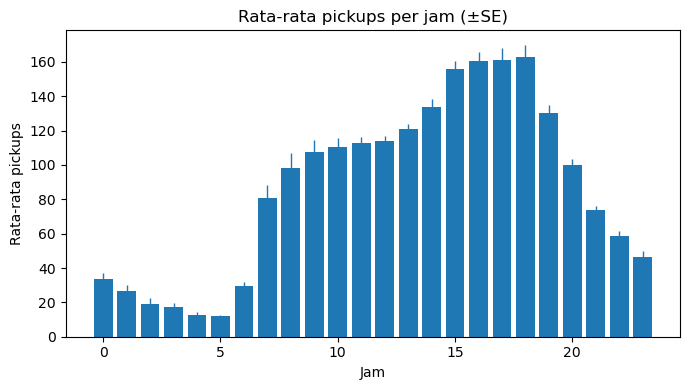

In [147]:
agg = t.groupby('pickup_hour')['pickups'].agg(['mean','std','count']).reset_index()
agg['se'] = agg['std'] / np.sqrt(agg['count'].clip(lower=1))

plt.figure(figsize=(7,4))
plt.bar(agg['pickup_hour'], agg['mean'])
plt.errorbar(agg['pickup_hour'], agg['mean'], yerr=agg['se'], fmt='none', elinewidth=1)
plt.title('Rata-rata pickups per jam (±SE)')
plt.xlabel('Jam'); plt.ylabel('Rata-rata pickups'); plt.tight_layout()
plt.show()

In [148]:
from scipy.stats import kruskal

In [149]:
groups = []
for hour, group in t.groupby('pickup_hour'):   
    groups.append(group['pickups'].values)


In [150]:
H, p = kruskal(*groups)

In [151]:
print(f"Kruskal–Wallis: H={H:.4f}, p={p:.6g}")

Kruskal–Wallis: H=594.9827, p=5.15993e-111


* p valuenya lebih kecil dari 0,05. Berarti minimal ada satu jam yang distribusinya berbeda.

In [152]:
df_clean['pickup_tod4'].unique()

['malam', 'pagi', 'siang', 'sore']
Categories (4, object): ['pagi' < 'siang' < 'sore' < 'malam']

In [153]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,1,1,Sunday,0,26,1–3,malam,11.016667,14.051437,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,1,1,Sunday,0,51,1–3,malam,6.766667,16.049261,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,1,1,Sunday,0,13,1–3,malam,5.816667,13.409742,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,1,1,Sunday,0,33,1–3,malam,5.966667,11.061453,2023-01-01
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,1,1,Sunday,0,53,1–3,malam,17.550000,9.504274,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,1,31,Tuesday,22,29,0–1,malam,13.000000,1.878840,2023-01-31
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,1,31,Tuesday,22,40,1–3,malam,8.000000,16.050000,2023-01-31
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,1,31,Tuesday,23,46,3–7,malam,16.000000,12.900000,2023-01-31
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,1,31,Tuesday,23,1,3–7,malam,18.000000,10.100000,2023-01-31


Terlihat kalau sore paling banyak pickup, diikuti dengan siang


In [154]:
t['pickup_share'] = t['pickups'] / t.groupby('pickup_date')['pickups'].transform('sum')
t

,pickup_date,pickup_hour,pickups,pickup_share
0,2023-01-01,0,81,0.058696
1,2023-01-01,1,80,0.057971
2,2023-01-01,2,80,0.057971
3,2023-01-01,3,59,0.042754
4,2023-01-01,4,29,0.021014
...,...,...,...,...
739,2023-01-31,19,143,0.065089
740,2023-01-31,20,120,0.054620
741,2023-01-31,21,84,0.038234
742,2023-01-31,22,70,0.031862


In [155]:
sore = [15,16,17,18]
gr = []
for jam in sore:
    gr.append(t.loc[t['pickup_hour'] == jam,'pickup_share'].values)

In [156]:
H, p = kruskal(*gr)
print(f"KW (pakai share): H={H:.3f}, p={p:.3g}")

KW (pakai share): H=5.900, p=0.117


pvalue lebih besar dari 0.05
brarti mirip2 jumlah pickup di sore hari

In [157]:
from scipy.stats import wilcoxon

peak_mean = (t[t['pickup_hour'].isin(sore)]
             .groupby('pickup_date')['pickup_share'].mean())
rest_mean = (t[~t['pickup_hour'].isin(sore)]
             .groupby('pickup_date')['pickup_share'].mean())

pair = pd.concat([peak_mean.rename('peak'), rest_mean.rename('rest')], axis=1).dropna()

W, p = wilcoxon(pair['peak'], pair['rest'], alternative='greater')
print(f"Wilcoxon paired (peak vs rest, per hari): W={W:.3f}, p={p:.6g}")

Wilcoxon paired (peak vs rest, per hari): W=496.000, p=4.65661e-10


pvalue lebih kecil dari 0.05
berarti emang jam-jam puncak (sore) lebih banyak pickup jumlahnya

In [158]:
t

,pickup_date,pickup_hour,pickups,pickup_share
0,2023-01-01,0,81,0.058696
1,2023-01-01,1,80,0.057971
2,2023-01-01,2,80,0.057971
3,2023-01-01,3,59,0.042754
4,2023-01-01,4,29,0.021014
...,...,...,...,...
739,2023-01-31,19,143,0.065089
740,2023-01-31,20,120,0.054620
741,2023-01-31,21,84,0.038234
742,2023-01-31,22,70,0.031862


In [159]:
daily = (t.groupby('pickup_date', as_index=False)['pickups']
           .sum()
           .rename(columns={'pickups':'daily_pickups'}))
daily

,pickup_date,daily_pickups
0,2023-01-01,1380
1,2023-01-02,1482
2,2023-01-03,1995
3,2023-01-04,2242
4,2023-01-05,2280
5,2023-01-06,2414
6,2023-01-07,2035
7,2023-01-08,1551
8,2023-01-09,2079
9,2023-01-10,2050


In [160]:
daily['pickup_date'] = pd.to_datetime(daily['pickup_date'])

In [161]:
daily['dow'] = daily['pickup_date'].dt.dayofweek

In [162]:
daily['is_weekend'] = daily['dow'] >= 5

In [163]:
wk = daily.loc[~daily['is_weekend'], 'daily_pickups'].values
we = daily.loc[ daily['is_weekend'], 'daily_pickups'].values

In [164]:
wk

array([1482, 1995, 2242, 2280, 2414, 2079, 2050, 2326, 2384, 2408, 1498,
       2130, 2217, 2495, 2362, 2252, 2261, 2543, 2492, 2312, 2122, 2197])

In [165]:
from scipy.stats import shapiro
result = shapiro(wk)
result

stats, p_value = shapiro(wk)

if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, datanya berdistribusi normal')
else:
    print(f'p_value = {p_value:.2f}, datanya tidak berdistribusi normal')

p_value = 0.00, datanya tidak berdistribusi normal


In [166]:
from scipy.stats import mannwhitneyu
U, p = mannwhitneyu(wk, we, alternative='two-sided')

In [167]:
print(f'MWU (weekday vs weekend): U={U:.2f}, p={p:.6g}')

MWU (weekday vs weekend): U=178.50, p=0.000585205


p value lebih kecil, berarti distribusinya tidak sama 

In [168]:
U, p = mannwhitneyu(wk, we, alternative='greater')
print(f'MWU (weekday vs weekend): U={U:.2f}, p={p:.6g}')

MWU (weekday vs weekend): U=178.50, p=0.000292603


p value lebih kecil, lebih banyak pick up pada weekday

In [169]:
daily

,pickup_date,daily_pickups,dow,is_weekend
0,2023-01-01,1380,6,True
1,2023-01-02,1482,0,False
2,2023-01-03,1995,1,False
3,2023-01-04,2242,2,False
4,2023-01-05,2280,3,False
5,2023-01-06,2414,4,False
6,2023-01-07,2035,5,True
7,2023-01-08,1551,6,True
8,2023-01-09,2079,0,False
9,2023-01-10,2050,1,False


In [170]:
dow_map = {0:'Senin',1:'Selasa',2:'Rabu',3:'Kamis',4:'Jumat',5:'Sabtu',6:'Minggu'}
daily['dow_name'] = pd.Categorical(
    daily['dow'].map(dow_map),
    categories=['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'],
    ordered=True
)
daily

,pickup_date,daily_pickups,dow,is_weekend,dow_name
0,2023-01-01,1380,6,True,Minggu
1,2023-01-02,1482,0,False,Senin
2,2023-01-03,1995,1,False,Selasa
3,2023-01-04,2242,2,False,Rabu
4,2023-01-05,2280,3,False,Kamis
5,2023-01-06,2414,4,False,Jumat
6,2023-01-07,2035,5,True,Sabtu
7,2023-01-08,1551,6,True,Minggu
8,2023-01-09,2079,0,False,Senin
9,2023-01-10,2050,1,False,Selasa


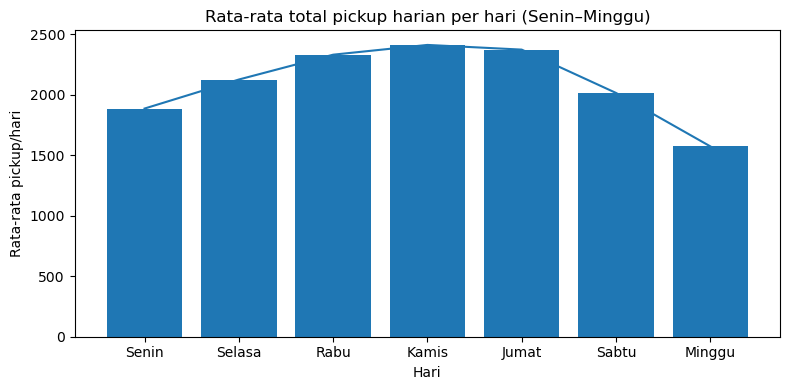

In [171]:
agg = daily.groupby('dow_name')['daily_pickups'].agg(['mean','std','count']).reset_index()
plt.figure(figsize=(8,4))
plt.bar(agg['dow_name'], agg['mean'])
plt.errorbar(agg['dow_name'], agg['mean'])
plt.title('Rata-rata total pickup harian per hari (Senin–Minggu)')
plt.xlabel('Hari'); plt.ylabel('Rata-rata pickup/hari'); plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

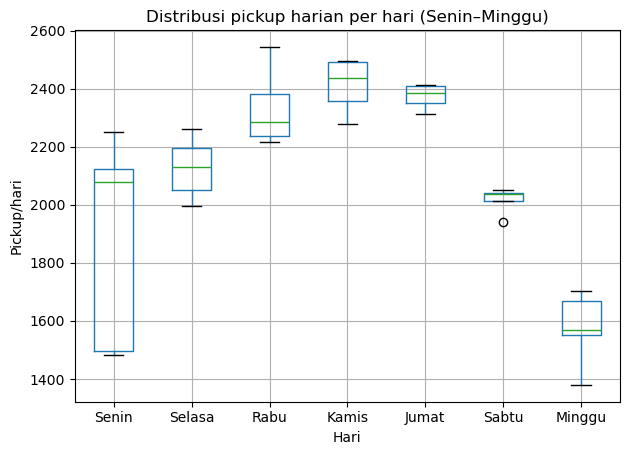

In [172]:
plt.figure(figsize=(8,4))
daily.boxplot(column='daily_pickups', by='dow_name')
plt.title('Distribusi pickup harian per hari (Senin–Minggu)')
plt.suptitle(''); plt.xlabel('Hari'); plt.ylabel('Pickup/hari'); plt.tight_layout()
plt.show()

Apakah kita bisa mengatakan hari rabu, kamis ,jumat yang merupakan jumlah pickup ketiga tertinggi dan cukup kecil variasinya , memiliki kecenderungan jam pick up di sore hari?

In [173]:
t

,pickup_date,pickup_hour,pickups,pickup_share
0,2023-01-01,0,81,0.058696
1,2023-01-01,1,80,0.057971
2,2023-01-01,2,80,0.057971
3,2023-01-01,3,59,0.042754
4,2023-01-01,4,29,0.021014
...,...,...,...,...
739,2023-01-31,19,143,0.065089
740,2023-01-31,20,120,0.054620
741,2023-01-31,21,84,0.038234
742,2023-01-31,22,70,0.031862


In [174]:
t['pickup_date'] = pd.to_datetime(t['pickup_date'])
t['dow'] = t['pickup_date'].dt.dayofweek
t

,pickup_date,pickup_hour,pickups,pickup_share,dow
0,2023-01-01,0,81,0.058696,6
1,2023-01-01,1,80,0.057971,6
2,2023-01-01,2,80,0.057971,6
3,2023-01-01,3,59,0.042754,6
4,2023-01-01,4,29,0.021014,6
...,...,...,...,...,...
739,2023-01-31,19,143,0.065089,1
740,2023-01-31,20,120,0.054620,1
741,2023-01-31,21,84,0.038234,1
742,2023-01-31,22,70,0.031862,1


In [175]:
dow_name = {0:'Sen',1:'Sel',2:'Rab',3:'Kam',4:'Jum',5:'Sab',6:'Min'}
peak_hours = {15,16,17,18}

In [176]:
t_rabukamisjumat = t[t['dow'].isin([2,3,4])]
peak_mean = (t_rabukamisjumat[t_rabukamisjumat['pickup_hour'].isin(sore)]
             .groupby('pickup_date')['pickup_share'].mean())
rest_mean = (t_rabukamisjumat[~t_rabukamisjumat['pickup_hour'].isin(sore)]
             .groupby('pickup_date')['pickup_share'].mean())

pair = pd.concat([peak_mean.rename('peak'), rest_mean.rename('rest')], axis=1).dropna()

W, p = wilcoxon(pair['peak'], pair['rest'], alternative='greater')
print(f"Wilcoxon paired (peak vs rest, per hari): W={W:.3f}, p={p:.6g}")

Wilcoxon paired (peak vs rest, per hari): W=78.000, p=0.000244141


**Kesimpulan** Hari Rabu–Kamis–Jumat memang cenderung padat di sore hari. Dengan kata lain, sore hari tetap jadi waktu paling sibuk dibanding jam lainnya di ketiga hari itu.

## Antar Zona

In [177]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_month,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,1,1,Sunday,0,26,1–3,malam,11.016667,14.051437,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,1,1,Sunday,0,51,1–3,malam,6.766667,16.049261,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,1,1,Sunday,0,13,1–3,malam,5.816667,13.409742,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,1,1,Sunday,0,33,1–3,malam,5.966667,11.061453,2023-01-01
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,1,1,Sunday,0,53,1–3,malam,17.550000,9.504274,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,1,31,Tuesday,22,29,0–1,malam,13.000000,1.878840,2023-01-31
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,1,31,Tuesday,22,40,1–3,malam,8.000000,16.050000,2023-01-31
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,1,31,Tuesday,23,46,3–7,malam,16.000000,12.900000,2023-01-31
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,1,31,Tuesday,23,1,3–7,malam,18.000000,10.100000,2023-01-31


In [178]:
pickup_counts = (
    df_clean.groupby('PULocationID')
      .size()  # hitung jumlah baris (trip) per pickup zone
      .reset_index(name='pickup_count')
)
dropoff_counts = (
    df_clean.groupby('DOLocationID')
      .size()
      .reset_index(name='dropoff_count')
)

In [179]:
zone_counts = (
    pickup_counts.merge(
        dropoff_counts,
        left_on='PULocationID',
        right_on='DOLocationID',
        how='outer'
    )
)

zone_counts['zone_id'] = zone_counts['PULocationID'].fillna(zone_counts['DOLocationID'])
zone_counts = zone_counts[['zone_id', 'pickup_count', 'dropoff_count']].fillna(0)

In [180]:
zone_counts

,zone_id,pickup_count,dropoff_count
0,1,0.0,22.0
1,10,15.0,147.0
2,100,0.0,122.0
3,101,2.0,17.0
4,102,17.0,242.0
...,...,...,...
242,94,11.0,17.0
243,95,3674.0,1510.0
244,96,0.0,30.0
245,97,2126.0,523.0


In [181]:
top_pickup = zone_counts.sort_values('pickup_count', ascending=False).head(10)
top_dropoff = zone_counts.sort_values('dropoff_count', ascending=False).head(10)

In [182]:
top_pickup

,zone_id,pickup_count,dropoff_count
221,74,12958.0,3291.0
222,75,8911.0,3416.0
188,41,3947.0,2558.0
68,166,3835.0,2230.0
243,95,3674.0,1510.0
190,43,2841.0,1267.0
230,82,2833.0,944.0
245,97,2126.0,523.0
149,244,1778.0,899.0
216,7,1765.0,1075.0


In [183]:
top_dropoff

,zone_id,pickup_count,dropoff_count
222,75,8911.0,3416.0
221,74,12958.0,3291.0
140,236,434.0,2727.0
188,41,3947.0,2558.0
142,238,0.0,2304.0
189,42,1707.0,2268.0
68,166,3835.0,2230.0
170,263,74.0,1539.0
243,95,3674.0,1510.0
143,239,2.0,1463.0


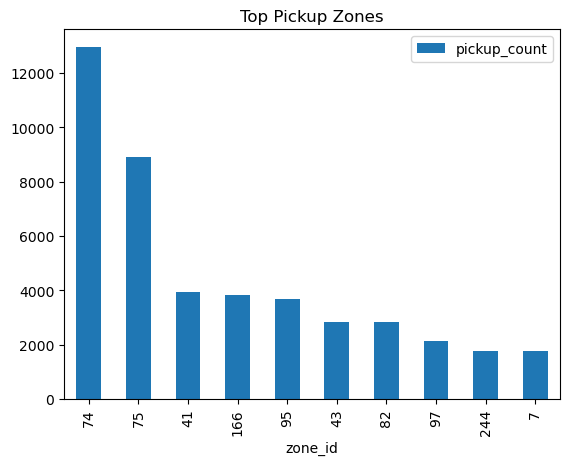

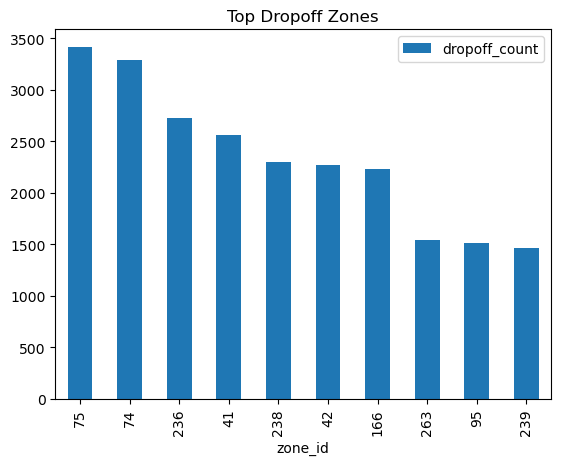

In [184]:
import matplotlib.pyplot as plt

top_pickup.plot(x='zone_id', y='pickup_count', kind='bar', title='Top Pickup Zones')
plt.show()

top_dropoff.plot(x='zone_id', y='dropoff_count', kind='bar', title='Top Dropoff Zones')
plt.show()


In [185]:
pu_zone = df.groupby('PULocationID').size().rename('pu_total').reset_index().sort_values('pu_total', ascending=False)
n_zones = len(pu_zone)
k_top   = max(1, int(np.ceil(0.10 * n_zones)))  # 10% teratas
k_top

23

In [186]:
pu_zone

,PULocationID,pu_total
202,74,13243
203,75,9085
169,41,4045
55,166,3875
223,95,3830
...,...,...
82,194,1
109,221,1
195,68,1
101,214,1


In [187]:
pu_zone.head(23)

,PULocationID,pu_total
202,74,13243
203,75,9085
169,41,4045
55,166,3875
223,95,3830
210,82,2916
171,43,2864
224,97,2193
197,7,1957
132,244,1804


In [188]:
top_zones = set(pu_zone.head(k_top)['PULocationID'])

In [189]:
persentase_top = pu_zone.head(k_top)['pu_total'].sum() / pu_zone['pu_total'].sum()
persentase_top

np.float64(0.8571617569236197)

Didapati bahwa sebanyak 85% panggilan pick up taxi terjadi pada 23 zona tersebut. 

In [190]:
print(f"[H1] Share top-decile (periode) = {persentase_top:.3%}  (top {k_top}/{n_zones} zona)")

[H1] Share top-decile (periode) = 85.716%  (top 23/226 zona)


hanya 23 zona teratas (sekitar 10% dari total zona) menyumbang lebih dari 85% seluruh pickup. Hal ini menandakan konsentrasi permintaan yang sangat tinggi di sebagian kecil wilayah, sehingga strategi alokasi armada sebaiknya difokuskan pada zona-zona ini

In [191]:
top = pu_zone.head(k_top)['pu_total']         
nontop = pu_zone.iloc[k_top:]['pu_total']

In [192]:
from scipy.stats import shapiro

stat_top, p_top = shapiro(top)
stat_non, p_non = shapiro(nontop)

print("Top zones:   W=%.3f, p=%.3g" % (stat_top, p_top))
print("Non-top zones: W=%.3f, p=%.3g" % (stat_non, p_non))

Top zones:   W=0.655, p=3.84e-06
Non-top zones: W=0.548, p=1.16e-22


lebih kecil dari 0.05 berarti distribusi tidak normal

In [193]:
U, p = mannwhitneyu(top, nontop, alternative='greater')
print(f"Mann-Whitney U: U={U:.3f}, p={p:.6g}")

Mann-Whitney U: U=4669.000, p=1.91093e-15


p value lebih kecil dari 0.05 berarti benar bahwa zona dalam top 23 jumlah pick up terbanyak lebih besar dari zona non top 

#### Pertanyaan: apakah kesimpulan tersebut konsisten tiap hari? 

Apakah median daily share pickup di top 10% zona lebih besar dari 50%?

In [194]:
top_zones

{'116',
 '129',
 '130',
 '134',
 '152',
 '166',
 '196',
 '244',
 '25',
 '260',
 '33',
 '41',
 '42',
 '43',
 '65',
 '66',
 '7',
 '74',
 '75',
 '82',
 '92',
 '95',
 '97'}

In [195]:
df_clean = df_clean.assign(is_top=df['PULocationID'].isin(top_zones))
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_day,pickup_weekday_name,pickup_hour,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date,is_top
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,1,Sunday,0,26,1–3,malam,11.016667,14.051437,2023-01-01,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,1,Sunday,0,51,1–3,malam,6.766667,16.049261,2023-01-01,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,1,Sunday,0,13,1–3,malam,5.816667,13.409742,2023-01-01,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,1,Sunday,0,33,1–3,malam,5.966667,11.061453,2023-01-01,True
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,1,Sunday,0,53,1–3,malam,17.550000,9.504274,2023-01-01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,31,Tuesday,22,29,0–1,malam,13.000000,1.878840,2023-01-31,False
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,31,Tuesday,22,40,1–3,malam,8.000000,16.050000,2023-01-31,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,31,Tuesday,23,46,3–7,malam,16.000000,12.900000,2023-01-31,True
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,31,Tuesday,23,1,3–7,malam,18.000000,10.100000,2023-01-31,False


In [196]:
df_clean.groupby(['pickup_date','is_top']).size().unstack(fill_value=0)

is_top,False,True
pickup_date,,
2023-01-01,268,1112
2023-01-02,187,1295
2023-01-03,202,1793
2023-01-04,212,2030
2023-01-05,276,2004
2023-01-06,275,2139
2023-01-07,298,1737
2023-01-08,229,1322
2023-01-09,240,1839


In [197]:
per_day = (df_clean.assign(is_top=df['PULocationID'].isin(top_zones))
             .groupby(['pickup_date','is_top']).size().unstack(fill_value=0))

In [198]:
per_day

is_top,False,True
pickup_date,,
2023-01-01,268,1112
2023-01-02,187,1295
2023-01-03,202,1793
2023-01-04,212,2030
2023-01-05,276,2004
2023-01-06,275,2139
2023-01-07,298,1737
2023-01-08,229,1322
2023-01-09,240,1839


In [199]:
share_day = (per_day[True] / per_day.sum(axis=1)).dropna()
share_day

pickup_date
2023-01-01    0.805797
2023-01-02    0.873819
2023-01-03    0.898747
2023-01-04    0.905442
2023-01-05    0.878947
2023-01-06    0.886081
2023-01-07    0.853563
2023-01-08    0.852353
2023-01-09    0.884560
2023-01-10    0.887805
2023-01-11    0.893809
2023-01-12    0.891359
2023-01-13    0.887874
2023-01-14    0.844870
2023-01-15    0.860911
2023-01-16    0.889186
2023-01-17    0.886854
2023-01-18    0.900767
2023-01-19    0.882164
2023-01-20    0.886113
2023-01-21    0.856585
2023-01-22    0.844392
2023-01-23    0.891208
2023-01-24    0.903582
2023-01-25    0.893040
2023-01-26    0.900482
2023-01-27    0.874567
2023-01-28    0.826982
2023-01-29    0.843312
2023-01-30    0.878888
2023-01-31    0.904415
dtype: float64

In [200]:
W, p = wilcoxon(share_day - 0.5, alternative='greater')
print(f"[H1] Wilcoxon one-sample: median share(top-decile)>50% ? p={p:.6g} (median={share_day.median():.3%}, n_days={len(share_day)})")

[H1] Wilcoxon one-sample: median share(top-decile)>50% ? p=4.65661e-10 (median=88.608%, n_days=31)


**pvalue di bawah 0.05 jadi benar kalau secara konsisten (per hari) top 10% zona menyumbang lebih dari separuh pickup total**

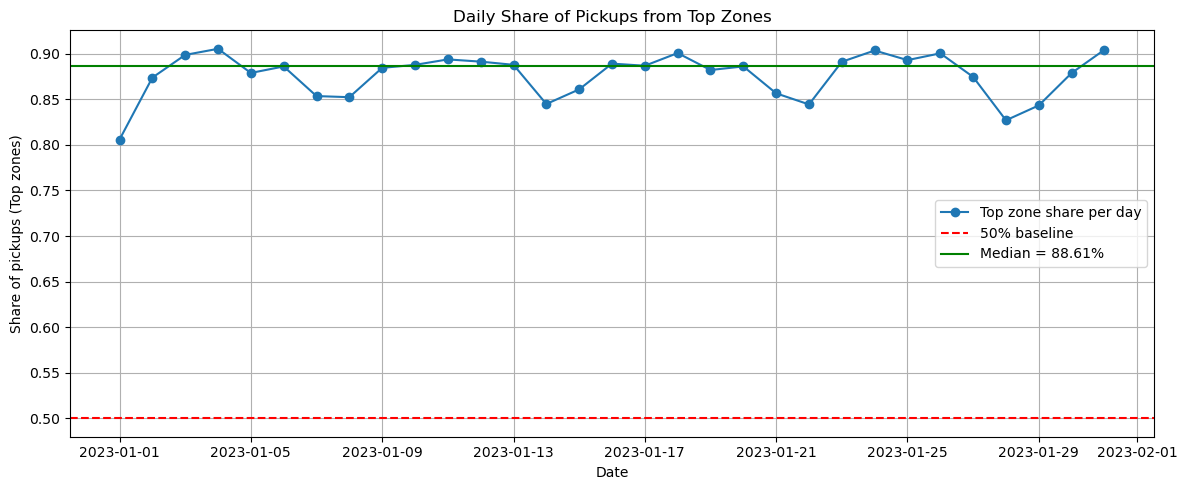

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(share_day.index, share_day.values, marker='o', label="Top zone share per day")
plt.axhline(0.5, color='red', linestyle='--', label="50% baseline")
median_val = share_day.median()
plt.axhline(median_val, color='green', linestyle='-', label=f"Median = {median_val:.2%}")
plt.title("Daily Share of Pickups from Top Zones")
plt.xlabel("Date")
plt.ylabel("Share of pickups (Top zones)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [202]:
df_clean['pickup_ts']   = df_clean['lpep_pickup_datetime'].dt.floor('H')
df_clean['dropoff_ts']  = df_clean['lpep_dropoff_datetime'].dt.floor('H')


In [203]:
pu = df_clean.groupby(['PULocationID','pickup_ts']).size().rename('pu_count').reset_index()
pu

,PULocationID,pickup_ts,pu_count
0,10,2023-01-02 08:00:00,1
1,10,2023-01-06 09:00:00,1
2,10,2023-01-09 08:00:00,1
3,10,2023-01-10 17:00:00,1
4,10,2023-01-10 19:00:00,1
...,...,...,...
17265,98,2023-01-09 18:00:00,1
17266,98,2023-01-10 09:00:00,1
17267,98,2023-01-13 22:00:00,1
17268,98,2023-01-18 10:00:00,1


In [204]:
pu = pu.sort_values(['PULocationID','pickup_ts'])
pu

,PULocationID,pickup_ts,pu_count
0,10,2023-01-02 08:00:00,1
1,10,2023-01-06 09:00:00,1
2,10,2023-01-09 08:00:00,1
3,10,2023-01-10 17:00:00,1
4,10,2023-01-10 19:00:00,1
...,...,...,...
17265,98,2023-01-09 18:00:00,1
17266,98,2023-01-10 09:00:00,1
17267,98,2023-01-13 22:00:00,1
17268,98,2023-01-18 10:00:00,1


In [205]:
pu['next_pu'] = pu.groupby('PULocationID')['pu_count'].shift(-1)
pu

,PULocationID,pickup_ts,pu_count,next_pu
0,10,2023-01-02 08:00:00,1,1.0
1,10,2023-01-06 09:00:00,1,1.0
2,10,2023-01-09 08:00:00,1,1.0
3,10,2023-01-10 17:00:00,1,1.0
4,10,2023-01-10 19:00:00,1,1.0
...,...,...,...,...
17265,98,2023-01-09 18:00:00,1,1.0
17266,98,2023-01-10 09:00:00,1,1.0
17267,98,2023-01-13 22:00:00,1,1.0
17268,98,2023-01-18 10:00:00,1,1.0


In [206]:
pu[pu['pu_count']>30]

,PULocationID,pickup_ts,pu_count,next_pu
13261,74,2023-01-01 15:00:00,41,35.0
13262,74,2023-01-01 16:00:00,35,22.0
13280,74,2023-01-02 12:00:00,41,36.0
13281,74,2023-01-02 13:00:00,36,33.0
13282,74,2023-01-02 14:00:00,33,21.0
...,...,...,...,...
14474,75,2023-01-27 18:00:00,35,23.0
14534,75,2023-01-30 15:00:00,38,29.0
14536,75,2023-01-30 17:00:00,42,30.0
14558,75,2023-01-31 17:00:00,42,36.0


In [207]:
xh = pu.loc[pu['PULocationID'].isin(top_zones),  'next_pu'].dropna()
xn = pu.loc[~pu['PULocationID'].isin(top_zones), 'next_pu'].dropna()


In [208]:
U, p = mannwhitneyu(xh, xn, alternative='greater')

print(f"[H3] MWU next_pu (hotspot > non-hotspot): p={p:.15g} | medians {xh.median():.1f} vs {xn.median():.1f} | n={len(xh)}/{len(xn)}")

[H3] MWU next_pu (hotspot > non-hotspot): p=0 | medians 3.0 vs 1.0 | n=11129/5943


#### akan dites apakah zona hotspot memang cenderung punya pickup count yang lebih tinggi di jam berikutnya dibanding zona non-hotspot.
Kalau hasilnya signifikan → itu artinya hotspot nggak cuma ramai sekarang, tapi juga berlanjut ramai di jam berikutnya.

pvalue bernilai 0. Maka beanr bahwa hotspot (top 23 zona jumlah pickup terbanyak) cenderung berlanjut ramai di jam berikutnya

<Figure size 800x500 with 0 Axes>

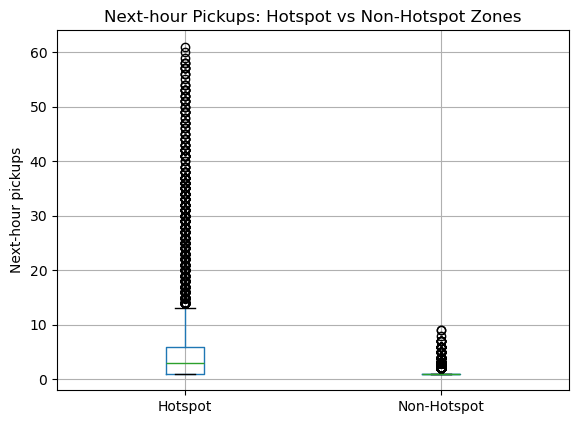

In [209]:
df_box = pd.DataFrame({
    "next_pu": np.concatenate([xh, xn]),
    "group": ["Hotspot"]*len(xh) + ["Non-Hotspot"]*len(xn)
})

# plot boxplot
plt.figure(figsize=(8,5))
df_box.boxplot(column="next_pu", by="group")
plt.title("Next-hour Pickups: Hotspot vs Non-Hotspot Zones")
plt.suptitle("")   # biar judul atas default hilang
plt.xlabel("")
plt.ylabel("Next-hour pickups")
plt.show()

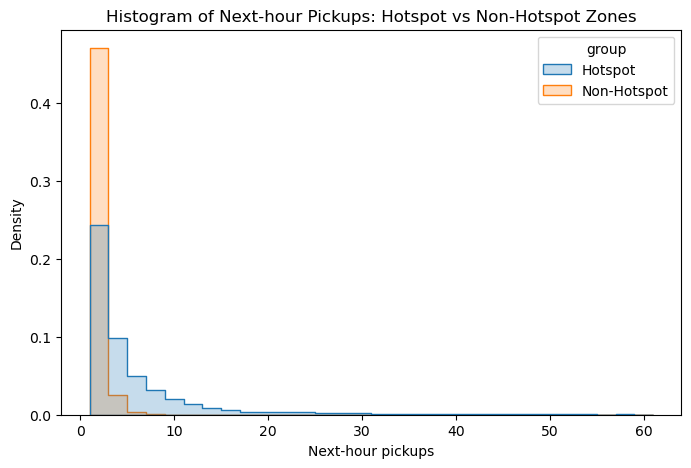

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df_box, x="next_pu", hue="group", 
             bins=30, kde=False, element="step", stat="density", common_norm=False)
plt.title("Histogram of Next-hour Pickups: Hotspot vs Non-Hotspot Zones")
plt.xlabel("Next-hour pickups")
plt.ylabel("Density")
plt.show()


In [211]:
len(df_clean)

64477

In [212]:
df_clean['dur_per_mile'] = np.where((df_clean['trip_distance']>0) & (df_clean['trip_duration_min']>0),
                              df_clean['trip_duration_min']/df_clean['trip_distance'], np.nan)
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,26,1–3,malam,11.016667,14.051437,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.270026
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,51,1–3,malam,6.766667,16.049261,2023-01-01,False,2023-01-01 00:00:00,2023-01-01 00:00:00,3.738490
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,13,1–3,malam,5.816667,13.409742,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.474359
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,33,1–3,malam,5.966667,11.061453,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,53,1–3,malam,17.550000,9.504274,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 01:00:00,6.312950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,29,0–1,malam,13.000000,1.878840,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,31.934598
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,40,1–3,malam,8.000000,16.050000,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,3.738318
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,46,3–7,malam,16.000000,12.900000,2023-01-31,True,2023-01-31 23:00:00,2023-02-01 00:00:00,4.651163
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,1,3–7,malam,18.000000,10.100000,2023-01-31,False,2023-01-31 23:00:00,2023-01-31 23:00:00,5.940594


In [213]:
eff = df_clean[['PULocationID','dur_per_mile']].dropna()
eff

,PULocationID,dur_per_mile
0,166,4.270026
1,24,3.738490
3,41,4.474359
4,41,5.424242
5,41,6.312950
...,...,...
68206,49,31.934598
68207,10,3.738318
68208,66,4.651163
68209,225,5.940594


In [214]:
eh = eff.loc[eff['PULocationID'].isin(top_zones), 'dur_per_mile']
en = eff.loc[~eff['PULocationID'].isin(top_zones), 'dur_per_mile']


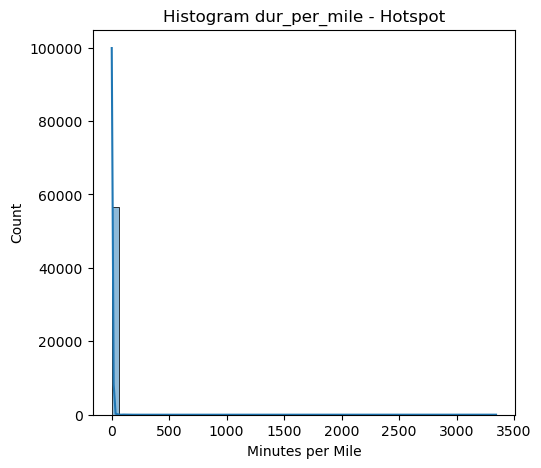

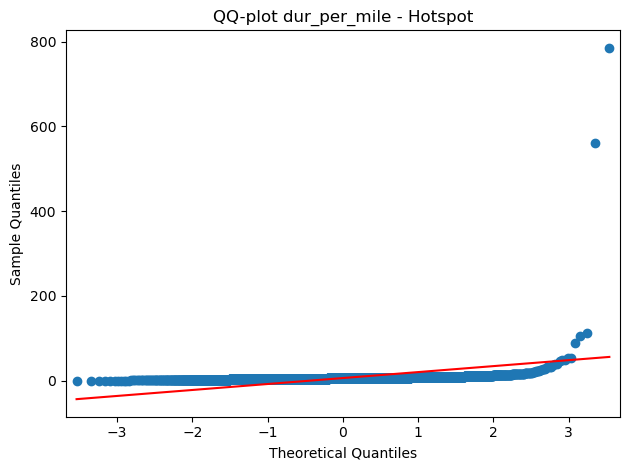

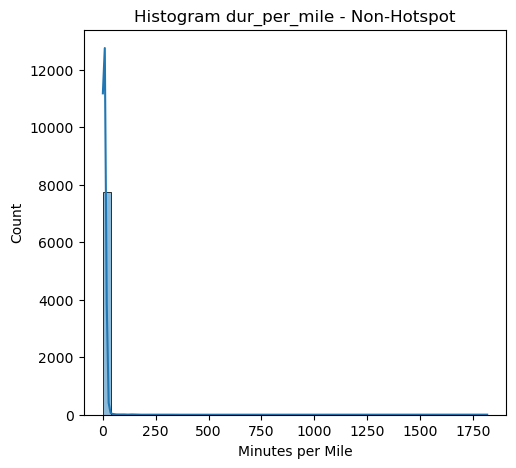

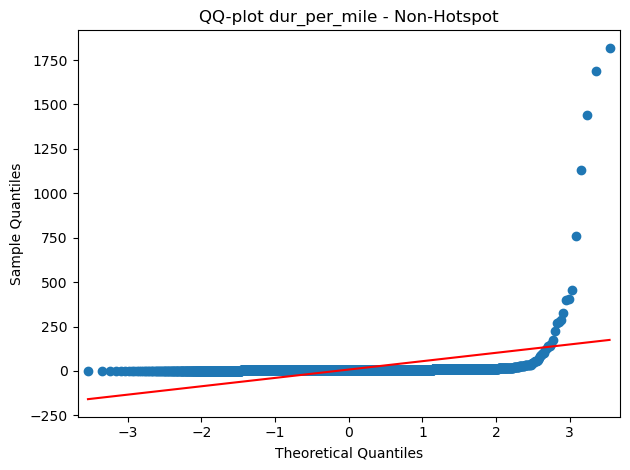

In [215]:
import statsmodels.api as sm

for label, data in [("Hotspot", eh), ("Non-Hotspot", en)]:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    sns.histplot(data, kde=True, bins=50)
    plt.title(f"Histogram dur_per_mile - {label}")
    plt.xlabel("Minutes per Mile")

    plt.subplot(1,2,2)
    sm.qqplot(data.sample(5000, random_state=42), line='s')
    plt.title(f"QQ-plot dur_per_mile - {label}")
    plt.tight_layout()
    plt.show()

In [216]:
U, p = mannwhitneyu(eh, en, alternative='less')
print(f"[H5] MWU dur_per_mile (hotspot < non-hotspot): p={p:.6g} | medians {eh.median():.2f} vs {en.median():.2f} min/mile | n={len(eh)}/{len(en)}")

[H5] MWU dur_per_mile (hotspot < non-hotspot): p=1 | medians 5.67 vs 5.39 min/mile | n=56665/7812


In [217]:
U, p = mannwhitneyu(eh, en, alternative='greater')
print(f"[H5] MWU dur_per_mile (hotspot > non-hotspot): p={p:.6g} | medians {eh.median():.2f} vs {en.median():.2f} min/mile | n={len(eh)}/{len(en)}")

[H5] MWU dur_per_mile (hotspot > non-hotspot): p=9.51541e-34 | medians 5.67 vs 5.39 min/mile | n=56665/7812


#### Didapati daerah hotspot zone ternyata tidak lebih efisien, malah cenderung lebih lama durasi per mile dibanding non-hotspot (Indikasi Kemacetan/Kepadatan)

In [218]:
pu

,PULocationID,pickup_ts,pu_count,next_pu
0,10,2023-01-02 08:00:00,1,1.0
1,10,2023-01-06 09:00:00,1,1.0
2,10,2023-01-09 08:00:00,1,1.0
3,10,2023-01-10 17:00:00,1,1.0
4,10,2023-01-10 19:00:00,1,1.0
...,...,...,...,...
17265,98,2023-01-09 18:00:00,1,1.0
17266,98,2023-01-10 09:00:00,1,1.0
17267,98,2023-01-13 22:00:00,1,1.0
17268,98,2023-01-18 10:00:00,1,1.0


In [219]:
pu2 = pu.rename(columns={'PULocationID':'zone','pickup_ts':'hour_ts'})
pu2

,zone,hour_ts,pu_count,next_pu
0,10,2023-01-02 08:00:00,1,1.0
1,10,2023-01-06 09:00:00,1,1.0
2,10,2023-01-09 08:00:00,1,1.0
3,10,2023-01-10 17:00:00,1,1.0
4,10,2023-01-10 19:00:00,1,1.0
...,...,...,...,...
17265,98,2023-01-09 18:00:00,1,1.0
17266,98,2023-01-10 09:00:00,1,1.0
17267,98,2023-01-13 22:00:00,1,1.0
17268,98,2023-01-18 10:00:00,1,1.0


In [220]:
do  = (df_clean.groupby(['DOLocationID','dropoff_ts']).size()
         .rename('do_count').reset_index()
         .rename(columns={'DOLocationID':'zone','dropoff_ts':'hour_ts'}))


In [221]:
do

,zone,hour_ts,do_count
0,1,2023-01-01 17:00:00,1
1,1,2023-01-02 09:00:00,1
2,1,2023-01-02 15:00:00,1
3,1,2023-01-04 09:00:00,1
4,1,2023-01-05 13:00:00,1
...,...,...,...
32327,98,2023-01-27 16:00:00,1
32328,98,2023-01-29 20:00:00,1
32329,98,2023-01-30 09:00:00,1
32330,98,2023-01-30 16:00:00,1


In [254]:
flow = pu2.merge(do, on=['zone','hour_ts'], how='outer').fillna(0)
flow

,zone,hour_ts,pu_count,next_pu,do_count
0,1,2023-01-01 17:00:00,0.0,0.0,1.0
1,1,2023-01-02 09:00:00,0.0,0.0,1.0
2,1,2023-01-02 15:00:00,0.0,0.0,1.0
3,1,2023-01-04 09:00:00,0.0,0.0,1.0
4,1,2023-01-05 13:00:00,0.0,0.0,1.0
...,...,...,...,...,...
39339,98,2023-01-29 20:00:00,0.0,0.0,1.0
39340,98,2023-01-30 09:00:00,0.0,0.0,1.0
39341,98,2023-01-30 10:00:00,1.0,0.0,0.0
39342,98,2023-01-30 16:00:00,0.0,0.0,1.0


In [255]:
flow['net_flow'] = flow['pu_count'] - flow['do_count']
flow

,zone,hour_ts,pu_count,next_pu,do_count,net_flow
0,1,2023-01-01 17:00:00,0.0,0.0,1.0,-1.0
1,1,2023-01-02 09:00:00,0.0,0.0,1.0,-1.0
2,1,2023-01-02 15:00:00,0.0,0.0,1.0,-1.0
3,1,2023-01-04 09:00:00,0.0,0.0,1.0,-1.0
4,1,2023-01-05 13:00:00,0.0,0.0,1.0,-1.0
...,...,...,...,...,...,...
39339,98,2023-01-29 20:00:00,0.0,0.0,1.0,-1.0
39340,98,2023-01-30 09:00:00,0.0,0.0,1.0,-1.0
39341,98,2023-01-30 10:00:00,1.0,0.0,0.0,1.0
39342,98,2023-01-30 16:00:00,0.0,0.0,1.0,-1.0


In [256]:
flow['date'] = flow['hour_ts'].dt.date
flow

,zone,hour_ts,pu_count,next_pu,do_count,net_flow,date
0,1,2023-01-01 17:00:00,0.0,0.0,1.0,-1.0,2023-01-01
1,1,2023-01-02 09:00:00,0.0,0.0,1.0,-1.0,2023-01-02
2,1,2023-01-02 15:00:00,0.0,0.0,1.0,-1.0,2023-01-02
3,1,2023-01-04 09:00:00,0.0,0.0,1.0,-1.0,2023-01-04
4,1,2023-01-05 13:00:00,0.0,0.0,1.0,-1.0,2023-01-05
...,...,...,...,...,...,...,...
39339,98,2023-01-29 20:00:00,0.0,0.0,1.0,-1.0,2023-01-29
39340,98,2023-01-30 09:00:00,0.0,0.0,1.0,-1.0,2023-01-30
39341,98,2023-01-30 10:00:00,1.0,0.0,0.0,1.0,2023-01-30
39342,98,2023-01-30 16:00:00,0.0,0.0,1.0,-1.0,2023-01-30


In [257]:
hot_zone_days = (flow[flow['zone'].isin(top_zones)]
                 .groupby(['zone','date'])['net_flow'].sum().reset_index())
hot_zone_days

,zone,date,net_flow
0,116,2023-01-01,-15.0
1,116,2023-01-02,-6.0
2,116,2023-01-03,-13.0
3,116,2023-01-04,4.0
4,116,2023-01-05,8.0
...,...,...,...
709,97,2023-01-27,41.0
710,97,2023-01-28,64.0
711,97,2023-01-29,64.0
712,97,2023-01-30,54.0


In [258]:
if len(hot_zone_days) >= 3:
    W, p = wilcoxon(hot_zone_days['net_flow'], alternative='greater')


In [259]:
W,p

(np.float64(230152.0), np.float64(1.4612334992068722e-83))

apakah di hotspot(tempat top terjadi pickup), secara konsisten supply berkurang (lebih banyak PU daripada DO)?

Akan dilakukan pengecekan apakah zona hotspot cenderung kekurangan supply driver (lebih banyak penumpang naik daripada turun) dengan uji Wilcoxon satu sampel.

Hipotesis:
* H0: median net_flow = 0
* H1: median net_flow > 0

p value lebih kecil dari 0.05. Berarti benar kalo lebih banyak PU daripada DO pada daerah hotspot

In [268]:
hot_zone_2 = (flow[abs(flow['net_flow'])>5]
                 .groupby(['zone','date'])['net_flow'].sum().reset_index())
hot_zone_2

,zone,date,net_flow
0,112,2023-01-07,7.0
1,112,2023-01-14,6.0
2,112,2023-01-22,6.0
3,116,2023-01-04,1.0
4,116,2023-01-06,7.0
...,...,...,...
568,97,2023-01-27,15.0
569,97,2023-01-28,32.0
570,97,2023-01-29,62.0
571,97,2023-01-30,27.0


In [269]:
W, p = wilcoxon(hot_zone_2['net_flow'], alternative='greater')
W,p

(np.float64(110163.0), np.float64(1.1849624487566877e-13))

* untuk alur pickup-dropoff yang berbeda lebih dari 5 panggilan taxi pun juga setelah diuji tetap pvalue kurang dari 0.05
* berarti disimpulkan lebih banyak PU daripada DO secara general

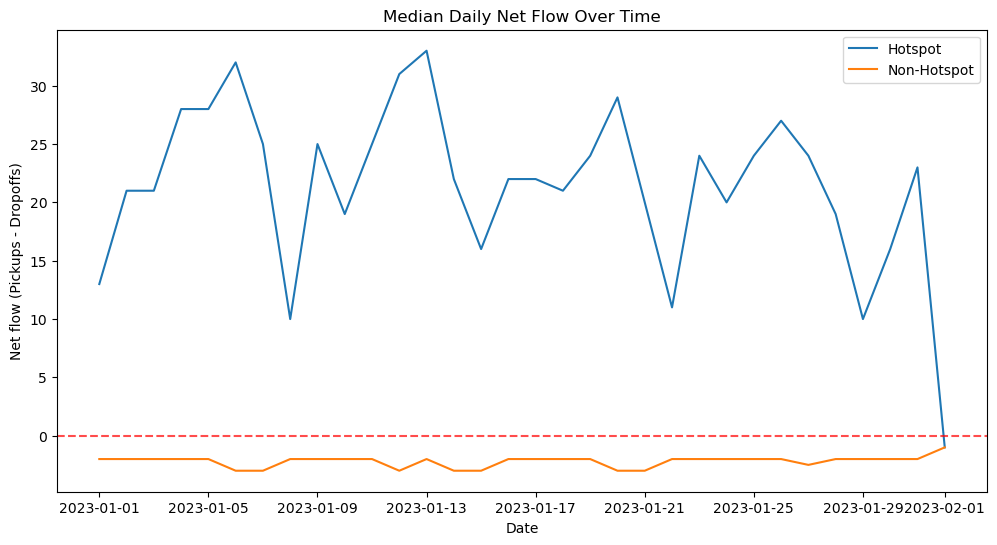

In [228]:
daily_flow = (flow.groupby(['zone','date'])['net_flow']
              .sum().reset_index())

daily_flow['group'] = daily_flow['zone'].apply(
    lambda z: "Hotspot" if z in top_zones else "Non-Hotspot"
)

# rata-rata/median net flow per hari untuk tiap group
grouped = (daily_flow.groupby(['date','group'])['net_flow']
           .median().reset_index())


plt.figure(figsize=(12,6))
for g in grouped['group'].unique():
    subset = grouped[grouped['group']==g]
    plt.plot(subset['date'], subset['net_flow'], label=g)

plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.title("Median Daily Net Flow Over Time")
plt.ylabel("Net flow (Pickups - Dropoffs)")
plt.xlabel("Date")
plt.show()


### Trip Length Mix (Short/Long)

Ingin diketahui apakah perjalanan panjang (Long-trip) lebih sering berakhir di zona low-demand 

Lalu juga ingin diketahui distribusi distance beda antar jam.


In [230]:
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_minute,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,26,1–3,malam,11.016667,14.051437,2023-01-01,True,2023-01-01,2023-01-01 00:00:00,4.270026
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,51,1–3,malam,6.766667,16.049261,2023-01-01,False,2023-01-01,2023-01-01 00:00:00,3.738490
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,13,1–3,malam,5.816667,13.409742,2023-01-01,True,2023-01-01,2023-01-01 00:00:00,4.474359
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,33,1–3,malam,5.966667,11.061453,2023-01-01,True,2023-01-01,2023-01-01 00:00:00,5.424242
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,53,1–3,malam,17.550000,9.504274,2023-01-01,True,2023-01-01,2023-01-01 01:00:00,6.312950


In [231]:
jam_produktif = {7,8,9,10,15,16,17,18}
df_clean['is_prod_hour'] = df_clean['pickup_hour'].isin(jam_produktif)
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_distance_cat,pickup_tod4,trip_duration_min,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,1–3,malam,11.016667,14.051437,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.270026,False
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,1–3,malam,6.766667,16.049261,2023-01-01,False,2023-01-01 00:00:00,2023-01-01 00:00:00,3.738490,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,1–3,malam,5.816667,13.409742,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.474359,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,1–3,malam,5.966667,11.061453,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242,False
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,1–3,malam,17.550000,9.504274,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 01:00:00,6.312950,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,0–1,malam,13.000000,1.878840,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,31.934598,False
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,1–3,malam,8.000000,16.050000,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,3.738318,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,3–7,malam,16.000000,12.900000,2023-01-31,True,2023-01-31 23:00:00,2023-02-01 00:00:00,4.651163,False
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,3–7,malam,18.000000,10.100000,2023-01-31,False,2023-01-31 23:00:00,2023-01-31 23:00:00,5.940594,False


In [234]:
pu_zone_total = df_clean.groupby('PULocationID').size().rename('pu_total').reset_index()
th_low = pu_zone_total['pu_total'].quantile(0.25)
low_demand = set(pu_zone_total.loc[pu_zone_total['pu_total']<=th_low, 'PULocationID'])
df_clean['drop_to_lowdemand'] = df_clean['DOLocationID'].isin(low_demand)
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_tod4,trip_duration_min,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour,drop_to_lowdemand
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,malam,11.016667,14.051437,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.270026,False,False
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,malam,6.766667,16.049261,2023-01-01,False,2023-01-01 00:00:00,2023-01-01 00:00:00,3.738490,False,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,malam,5.816667,13.409742,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.474359,False,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,malam,5.966667,11.061453,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242,False,False
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,malam,17.550000,9.504274,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 01:00:00,6.312950,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,malam,13.000000,1.878840,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,31.934598,False,False
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,malam,8.000000,16.050000,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,3.738318,False,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,malam,16.000000,12.900000,2023-01-31,True,2023-01-31 23:00:00,2023-02-01 00:00:00,4.651163,False,False
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,malam,18.000000,10.100000,2023-01-31,False,2023-01-31 23:00:00,2023-01-31 23:00:00,5.940594,False,False


In [236]:
df_clean = df_clean.drop(columns = ['trip_distance_cat'])
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_tod4,trip_duration_min,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour,drop_to_lowdemand
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,malam,11.016667,14.051437,2023-01-01,True,2023-01-01,2023-01-01 00:00:00,4.270026,False,False
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,malam,6.766667,16.049261,2023-01-01,False,2023-01-01,2023-01-01 00:00:00,3.738490,False,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,malam,5.816667,13.409742,2023-01-01,True,2023-01-01,2023-01-01 00:00:00,4.474359,False,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,malam,5.966667,11.061453,2023-01-01,True,2023-01-01,2023-01-01 00:00:00,5.424242,False,False
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,malam,17.550000,9.504274,2023-01-01,True,2023-01-01,2023-01-01 01:00:00,6.312950,False,True


In [237]:
df_clean.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'totalfee',
       'diff_fee', 'pickup_month', 'pickup_day', 'pickup_weekday_name',
       'pickup_hour', 'pickup_minute', 'pickup_tod4', 'trip_duration_min',
       'speed_mph', 'pickup_date', 'is_top', 'pickup_ts', 'dropoff_ts',
       'dur_per_mile', 'is_prod_hour', 'drop_to_lowdemand'],
      dtype='object')

In [238]:
q1, q3 = df_clean['trip_distance'].quantile([0.25, 0.75])
df_clean['trip_len_cat'] = pd.cut(
    df_clean['trip_distance'],
    bins=[-np.inf, q1, q3, np.inf],
    labels=['short','mid','long'],
    ordered=True
)
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration_min,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour,drop_to_lowdemand,trip_len_cat
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,11.016667,14.051437,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.270026,False,False,mid
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,6.766667,16.049261,2023-01-01,False,2023-01-01 00:00:00,2023-01-01 00:00:00,3.738490,False,False,mid
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,5.816667,13.409742,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.474359,False,False,mid
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,5.966667,11.061453,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242,False,False,short
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,17.550000,9.504274,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 01:00:00,6.312950,False,True,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,13.000000,1.878840,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,31.934598,False,False,short
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,8.000000,16.050000,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,3.738318,False,False,mid
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,16.000000,12.900000,2023-01-31,True,2023-01-31 23:00:00,2023-02-01 00:00:00,4.651163,False,False,long
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,18.000000,10.100000,2023-01-31,False,2023-01-31 23:00:00,2023-01-31 23:00:00,5.940594,False,False,mid


In [240]:
from scipy.stats import chi2_contingency

In [243]:
tab = pd.crosstab(df_clean['is_prod_hour'], df_clean['trip_len_cat']=='short')
chi2, p, dof, _ = chi2_contingency(tab)
print(f"[H1] Chi-square (rush vs short-trip): chi2={chi2:.3f}, p={p:.6g}, table=\n{tab}")

[H1] Chi-square (rush vs short-trip): chi2=0.293, p=0.588272, table=
trip_len_cat  False  True 
is_prod_hour              
False         24170   8141
True          24122   8044


* dari jam 7 pagi sampai jam 18 tidak ada hubungan signifikan dengan jarak trip short

In [244]:
jam_rush = {15,16,17,18}
df_clean['is_rush_hour'] = df_clean['pickup_hour'].isin(jam_rush)
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,speed_mph,pickup_date,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour,drop_to_lowdemand,trip_len_cat,is_rush_hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,14.051437,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.270026,False,False,mid,False
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,16.049261,2023-01-01,False,2023-01-01 00:00:00,2023-01-01 00:00:00,3.738490,False,False,mid,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,13.409742,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.474359,False,False,mid,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,11.061453,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242,False,False,short,False
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,9.504274,2023-01-01,True,2023-01-01 00:00:00,2023-01-01 01:00:00,6.312950,False,True,mid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,1.878840,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,31.934598,False,False,short,False
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,16.050000,2023-01-31,False,2023-01-31 22:00:00,2023-01-31 22:00:00,3.738318,False,False,mid,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,12.900000,2023-01-31,True,2023-01-31 23:00:00,2023-02-01 00:00:00,4.651163,False,False,long,False
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,10.100000,2023-01-31,False,2023-01-31 23:00:00,2023-01-31 23:00:00,5.940594,False,False,mid,False


In [245]:
tab = pd.crosstab(df_clean['is_rush_hour'], df_clean['trip_len_cat']=='short')
chi2, p, dof, _ = chi2_contingency(tab)
print(f"[H1] Chi-square (rush vs short-trip): chi2={chi2:.3f}, p={p:.6g}, table=\n{tab}")

[H1] Chi-square (rush vs short-trip): chi2=6.877, p=0.00873357, table=
trip_len_cat  False  True 
is_rush_hour              
False         33563  11070
True          14729   5115


* pvalue lebih kecil dari 0.05 berarti ada hubungan signifikan antara rush hour dengan jarak trip taxi short

* menguji apakah proporsi short trip lebih turun di rush hour dibanding non-rush hour.

In [246]:
tab = pd.crosstab(df_clean['is_rush_hour'], df_clean['trip_len_cat']=='long')
chi2, p, dof, _ = chi2_contingency(tab)
print(f"[H1] Chi-square (rush vs short-trip): chi2={chi2:.3f}, p={p:.6g}, table=\n{tab}")

[H1] Chi-square (rush vs short-trip): chi2=188.662, p=6.23012e-43, table=
trip_len_cat  False  True 
is_rush_hour              
False         32783  11850
True          15583   4261


Short trips: ada perbedaan proporsi yang kecil tapi signifikan (p=0.0087).

Long trips: perbedaan proporsinya jauh lebih kuat (p≈0).

Insight bisnis: Rush hour membuat perjalanan panjang makin jarang (orang lebih cenderung melakukan perjalanan pendek di dalam kota saja).

In [247]:
tab_ = pd.crosstab(df_clean['trip_len_cat']=='long', df_clean['drop_to_lowdemand'])
chi2, p, dof, _ = chi2_contingency(tab_)
print(f"[H3] Chi-square (long-trip vs drop_to_lowdemand): chi2={chi2:.3f}, p={p:.6g}, table=\n{tab_}")

[H3] Chi-square (long-trip vs drop_to_lowdemand): chi2=139.540, p=3.35605e-32, table=
drop_to_lowdemand  False  True 
trip_len_cat                   
False              44370   3996
True               14283   1828


disimpulkan bahwa ada hubungan signifikan antara panjang perjalanan (long trip atau tidak) dan kemungkinan drop-off ke low demand.

In [248]:
1828/(1828+14283)

0.11346285146794116

In [249]:
3996/(3996+44370)

0.08262002232973577

lebih banyak persentase long trip (11%) yang pergi ke zona sepi. Jadi long trips lebih sering bikin driver “nyangkut” di zona sepi.

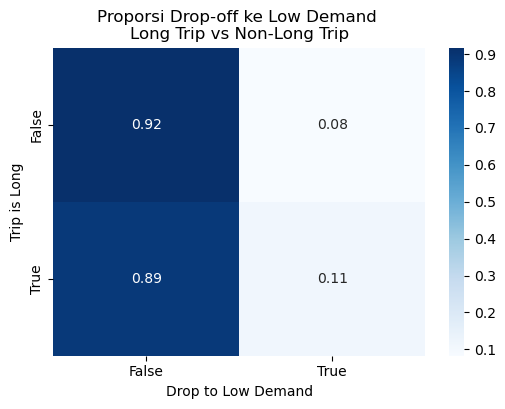

In [250]:
tab_prop = pd.crosstab(
    df_clean['trip_len_cat']=='long',
    df_clean['drop_to_lowdemand'],
    normalize='index'  # biar per baris jadi proporsi
)

plt.figure(figsize=(6,4))
sns.heatmap(tab_prop, annot=True, cmap="Blues", fmt=".2f")

plt.title("Proporsi Drop-off ke Low Demand \nLong Trip vs Non-Long Trip")
plt.xlabel("Drop to Low Demand")
plt.ylabel("Trip is Long")
plt.show()

Meskipun uji Chi-square menunjukkan hubungan signifikan antara long-trip dan drop ke low demand (p<0.001), perbedaan proporsinya relatif kecil (11% vs 8%)

In [251]:
groups = [g['trip_distance'].dropna().values 
          for _, g in df_clean.groupby('pickup_hour') if len(g) > 0]
H, p = kruskal(*groups)
print(f"Kruskal-Wallis trip_distance antar jam: H={H:.3f}, p={p:.6g}")

Kruskal-Wallis trip_distance antar jam: H=404.916, p=1.72827e-71


jarak tempuh trip taksi memang berbeda signifikan tergantung jam berangkatnya

In [252]:
df_sub = df_clean[df_clean['pickup_hour'].isin([3,4,5,6])]

# group per jam → ambil trip_distance
groups = [g['trip_distance'].dropna().values 
          for _, g in df_sub.groupby('pickup_hour') if len(g) > 0]

H, p = kruskal(*groups)
print(f"Kruskal-Wallis (jam 3–6): H={H:.3f}, p={p:.6g}")

Kruskal-Wallis (jam 3–6): H=30.298, p=1.1945e-06


berarti ada perbedaan signifikan distribusi trip_distance antara jam 3, 4, 5, dan 6.
Artinya, median jarak trip di keempat jam ini tidak sama. Ada jam yang cenderung punya trip lebih panjang/pendek.

### Utilization & Earnings Proxy

In [272]:
df_clean['revenue_per_min']  = df_clean['total_amount']/df_clean['trip_duration_min']
df_clean['revenue_per_mile'] = df_clean['total_amount']/df_clean['trip_distance']
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour,drop_to_lowdemand,trip_len_cat,is_rush_hour,revenue_per_min,revenue_per_mile
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.580000,14.90,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.270026,False,False,mid,False,2.194856,9.372093
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.810000,10.70,...,False,2023-01-01 00:00:00,2023-01-01 00:00:00,3.738490,False,False,mid,False,2.340887,8.751381
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.300000,6.50,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,4.474359,False,False,mid,False,1.753582,7.846154
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.100000,6.00,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242,False,False,short,False,1.340782,7.272727
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.780000,17.70,...,True,2023-01-01 00:00:00,2023-01-01 01:00:00,6.312950,False,True,mid,False,1.307692,8.255396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,unknown,unknown,49,62,1.0,0.407082,15.70,...,False,2023-01-31 22:00:00,2023-01-31 22:00:00,31.934598,False,False,short,False,1.284615,41.023676
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,unknown,unknown,10,205,1.0,2.140000,4.41,...,False,2023-01-31 22:00:00,2023-01-31 22:00:00,3.738318,False,False,mid,False,0.676250,2.528037
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,unknown,unknown,66,37,1.0,3.440000,16.53,...,True,2023-01-31 23:00:00,2023-02-01 00:00:00,4.651163,False,False,long,False,1.315000,6.116279
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,unknown,unknown,225,189,1.0,3.030000,14.98,...,False,2023-01-31 23:00:00,2023-01-31 23:00:00,5.940594,False,False,mid,False,1.065556,6.330033


In [275]:
groups = [g['revenue_per_min'].dropna().values for _, g in df_clean.groupby('PULocationID')]
groups

[array([  2.61570248,   1.59836066,   1.10606061,   1.73195876,
          1.2       ,   2.0376506 ,   2.48209719,   1.48941469,
          2.06785137, 106.36363636,   1.8       ,   3.34615385,
          0.        ,   1.19305019,   0.67625   ]),
 array([180., 150.]),
 array([0.96656535, 1.00811993, 1.75619632, 0.9851279 , 1.61676647,
        1.22254812, 1.53819271, 0.91246944, 0.89582333, 0.94117647,
        1.63227486, 0.93940635, 1.34444444, 0.90850202, 1.34355828,
        0.92242195, 1.50268817]),
 array([1.13597246, 1.92114014, 1.48812665, 1.15669797, 2.39323944,
        2.3081225 , 1.20138889, 1.275     , 1.18208333, 1.51692308,
        3.124     , 1.06321429, 2.255625  , 1.18363636, 1.332     ,
        2.92818182, 0.68731707, 0.78735294, 0.99555556, 0.66058824,
        1.00315789, 2.35692308]),
 array([ 1.5412844 ,  1.03518268,  1.2565445 ,  2.53521127,  0.55950653,
         1.09060023, 82.5       ,  1.16466667,  1.02692308]),
 array([ 3.28421053,  1.56808803, 16.70333333]),
 array

In [276]:
H1_H, H1_p = kruskal(*groups)
print(f"[H1] Kruskal revenue_per_min antar zona: H={H1_H:.3f}, p={H1_p:.6g}, k={len(groups)}")   

[H1] Kruskal revenue_per_min antar zona: H=4813.023, p=0, k=198


ada bukti sangat kuat bahwa zona-zona memang berbeda dalam hal revenue_per_min

In [278]:
groups2 = [g['revenue_per_min'].dropna().values for _, g in df_clean[df_clean['PULocationID'].isin(top_zones)].groupby('PULocationID')]
groups2

[array([  1.37642586,   1.2447205 ,   1.64351245,   2.81717452,
          2.73829787,   2.05870445,   2.40659341,   1.21577218,
          1.56852792,   1.31400966,   1.60458384,   0.97190083,
          1.90251917,   2.5891232 ,   2.56717557,   1.39694656,
          1.82035928,   1.49144487,   1.67381974,   2.18014706,
          1.32261768,   1.72661871,   1.80689655,   0.98754448,
          1.37569061,   2.13964687,   1.46376812,   1.66242038,
          1.2145749 ,   1.5       ,   1.95114504,   1.40561224,
          1.92619926,   1.60113314,   1.49625935,   1.38305085,
          1.53391304,   1.75049116,   1.27310924,   1.14508929,
          2.74285714,   1.35772358,   1.61637931,   1.61946903,
          1.24137931,   1.21782178,   1.13197674,   1.67716535,
          1.728     ,   1.80333179,   1.83263598,   1.91541136,
          2.20100503,   1.65608108,   1.52223006,   1.38690023,
          1.54039497,   1.86270968,   2.34098361,   2.11428571,
        220.        ,   2.26366002,   0.

In [279]:
H1_H, H1_p = kruskal(*groups2)
print(f"[H1] Kruskal revenue_per_min antar zona: H={H1_H:.3f}, p={H1_p:.6g}, k={len(groups2)}")   

[H1] Kruskal revenue_per_min antar zona: H=3433.798, p=0, k=23


setidaknya ada satu zona yang distribusi revenue_per_min-nya beda signifikan dibanding zona lain.

In [303]:
groups3 = [g['revenue_per_min'].dropna().values for _, g in df_clean.groupby('PULocationID')]

groups3 = [g for g in groups3 if len(g)>2000]
groups3

[array([2.19485628, 1.55407577, 1.94779772, ..., 1.3       , 1.732     ,
        1.22526316]),
 array([1.75358166, 1.34078212, 1.30769231, ..., 1.743     , 6.48333333,
        0.88107143]),
 array([2.63671875, 2.64507042, 2.72523364, ..., 1.488     , 1.42941176,
        2.015     ]),
 array([1.79140625, 1.5037594 , 1.28686327, ..., 1.01857143, 1.13857143,
        1.69454545]),
 array([2.37386139, 2.03072871, 2.96816327, ..., 2.52777778, 1.16125   ,
        1.39      ]),
 array([1.28033473, 1.74139535, 1.22922636, ..., 0.80102564, 1.67272727,
        1.67272727]),
 array([1.38589212, 2.77051978, 2.36449704, ..., 1.39375   , 0.8876    ,
        2.59571429]),
 array([1.2865566 , 1.9704797 , 2.6145283 , ..., 1.43315789, 0.86846154,
        1.1096    ])]

In [304]:
H1_H, H1_p = kruskal(*groups3)
print(f"[H1] Kruskal revenue_per_min antar zona: H={H1_H:.3f}, p={H1_p:.6g}, k={len(groups3)}")   

[H1] Kruskal revenue_per_min antar zona: H=2375.386, p=0, k=8


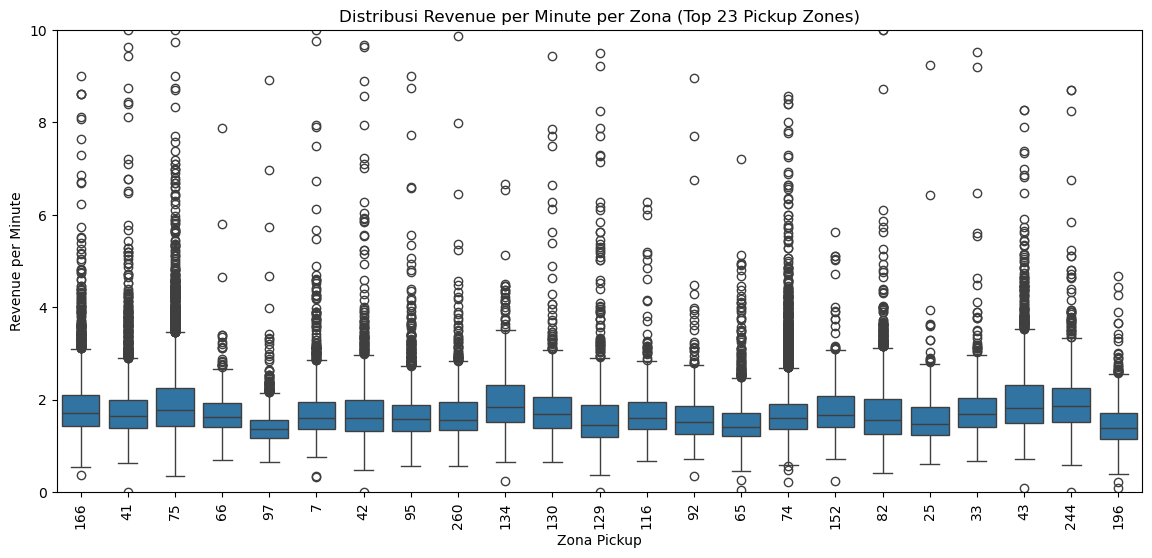

In [311]:
df_top = df_clean[df_clean['PULocationID'].isin(top_zones)]

plt.figure(figsize=(14,6))
sns.boxplot(x="PULocationID", y="revenue_per_min", data=df_top)
plt.xticks(rotation=90)
plt.title("Distribusi Revenue per Minute per Zona (Top 23 Pickup Zones)")
plt.ylabel("Revenue per Minute")
plt.xlabel("Zona Pickup")
plt.ylim(0, 10)
plt.show()

In [309]:
df_clean[df_clean['total_amount'] <= 10]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,is_top,pickup_ts,dropoff_ts,dur_per_mile,is_prod_hour,drop_to_lowdemand,trip_len_cat,is_rush_hour,revenue_per_min,revenue_per_mile
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.424242,False,False,short,False,1.340782,7.272727
21,2,2023-01-01 00:41:56,2023-01-01 00:46:06,N,1.0,42,42,1.0,0.53,5.80,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,7.861635,False,False,short,False,1.992000,15.660377
23,2,2023-01-01 00:55:13,2023-01-01 00:59:47,N,1.0,42,42,3.0,0.88,7.20,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.189394,False,False,short,False,2.124088,11.022727
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.00,...,False,2023-01-01 00:00:00,2023-01-01 00:00:00,0.012438,False,False,long,False,66.000000,0.820896
41,2,2023-01-01 00:08:05,2023-01-01 00:13:26,N,1.0,41,75,6.0,1.05,5.50,...,True,2023-01-01 00:00:00,2023-01-01 00:00:00,5.095238,False,False,short,False,1.525234,7.771429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66866,1,2023-01-22 07:59:01,2023-01-22 08:03:10,unknown,unknown,74,75,1.0,1.20,7.20,...,True,2023-01-22 07:00:00,2023-01-22 08:00:00,3.458333,True,False,short,False,2.226506,7.700000
67156,2,2023-01-24 10:31:00,2023-01-24 10:40:00,unknown,unknown,61,225,1.0,1.92,7.19,...,False,2023-01-24 10:00:00,2023-01-24 10:00:00,4.687500,True,False,mid,False,0.910000,4.265625
67819,1,2023-01-28 20:16:06,2023-01-28 20:22:30,unknown,unknown,41,41,1.0,0.30,5.50,...,True,2023-01-28 20:00:00,2023-01-28 20:00:00,21.333333,False,False,short,False,1.231250,26.266667
67962,1,2023-01-30 08:37:09,2023-01-30 08:43:47,unknown,unknown,74,41,1.0,1.20,6.50,...,True,2023-01-30 08:00:00,2023-01-30 08:00:00,5.527778,True,False,short,False,1.326633,7.333333


In [312]:
df_clean.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'totalfee',
       'diff_fee', 'pickup_month', 'pickup_day', 'pickup_weekday_name',
       'pickup_hour', 'pickup_minute', 'pickup_tod4', 'trip_duration_min',
       'speed_mph', 'pickup_date', 'is_top', 'pickup_ts', 'dropoff_ts',
       'dur_per_mile', 'is_prod_hour', 'drop_to_lowdemand', 'trip_len_cat',
       'is_rush_hour', 'revenue_per_min', 'revenue_per_mile'],
      dtype='object')

In [313]:
groups4 = [g['revenue_per_min'].dropna().values for _, g in df_clean.groupby('pickup_tod4')]
groups4

[array([1.97746479, 3.32      , 1.78571429, ..., 1.57      , 1.491875  ,
        1.22947368]),
 array([2.43785851, 2.77016129, 1.57758621, ..., 1.15722222, 1.38791667,
        0.23648649]),
 array([2.40659341, 2.38293217, 1.93411765, ..., 1.90666667, 1.15421053,
        5.64666667]),
 array([2.19485628, 2.3408867 , 1.75358166, ..., 1.315     , 1.06555556,
        1.8375    ])]

In [335]:
H1_H, H1_p = kruskal(*groups4)
print(f"[H1] Kruskal revenue_per_min antar waktu: H={H1_H:.3f}, p={H1_p:.6g}, k={len(groups4)}")   

[H1] Kruskal revenue_per_min antar waktu: H=2686.603, p=0, k=4


Disimpulkan bahwa ada 1 kategori waktu yang distribusinya berbeda signifikan dengan waktu lainnya

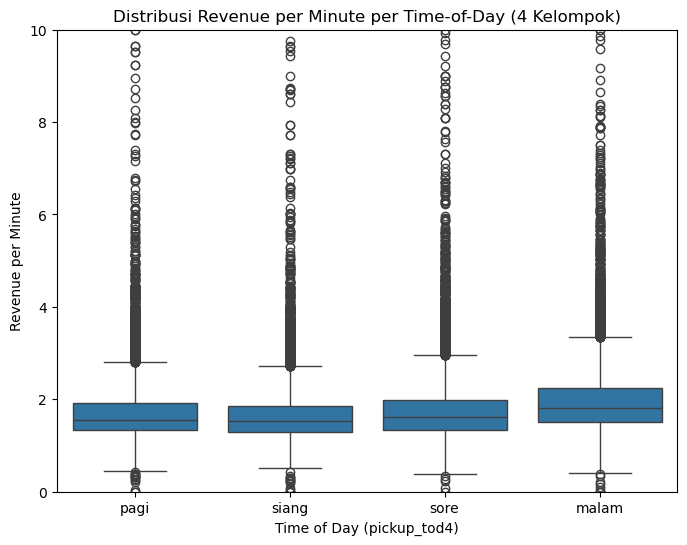

In [317]:
plt.figure(figsize=(8,6))
sns.boxplot(x='pickup_tod4', y='revenue_per_min', data=df_clean)
#sns.stripplot(x='pickup_tod4', y='revenue_per_min', data=df_clean, 
#              color='black', size=1, alpha=0.3)  # titik-titik data mentah

plt.title("Distribusi Revenue per Minute per Time-of-Day (4 Kelompok)")
plt.xlabel("Time of Day (pickup_tod4)")
plt.ylabel("Revenue per Minute")
plt.ylim(0, 10)  # biar gak ketutup outlier yang ekstrem
plt.show()

### jumlah penumpang

Ingin diketahui apakah jumlah penumpang pada tiap jamnya berbeda signifikan?

In [319]:
df_clean.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'totalfee',
       'diff_fee', 'pickup_month', 'pickup_day', 'pickup_weekday_name',
       'pickup_hour', 'pickup_minute', 'pickup_tod4', 'trip_duration_min',
       'speed_mph', 'pickup_date', 'is_top', 'pickup_ts', 'dropoff_ts',
       'dur_per_mile', 'is_prod_hour', 'drop_to_lowdemand', 'trip_len_cat',
       'is_rush_hour', 'revenue_per_min', 'revenue_per_mile'],
      dtype='object')

In [322]:
groups = [g['passenger_count'].dropna().values for _, g in df_clean.groupby('pickup_hour')]
H, p = kruskal(*groups)
print(f"[H1] Kruskal passenger_count antar jam: H={H:.3f}, p={p:.6g}")

[H1] Kruskal passenger_count antar jam: H=172.774, p=6.24077e-25


p value didapati lebih kecil dari 0.05. Sehingga disimpulkan jumlah penumpang memang berbeda signifikan antar jam.

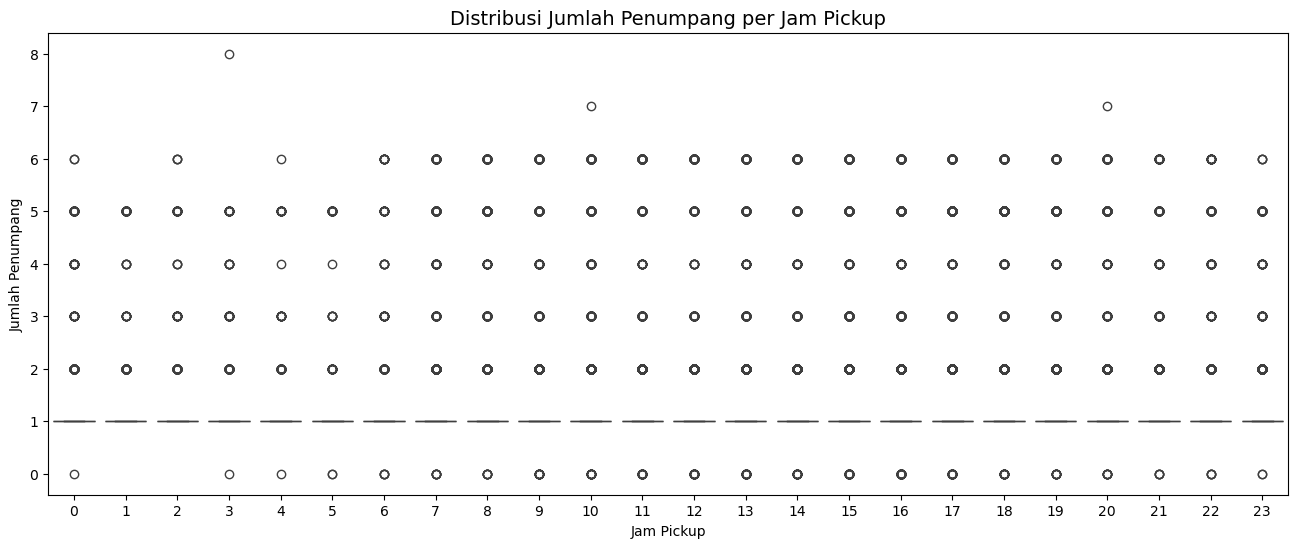

In [329]:
plt.figure(figsize=(16,6))
sns.boxplot(x="pickup_hour", y="passenger_count", data=df_clean, showfliers=True)
plt.title("Distribusi Jumlah Penumpang per Jam Pickup", fontsize=14)
plt.xlabel("Jam Pickup")
plt.ylabel("Jumlah Penumpang")
plt.show()

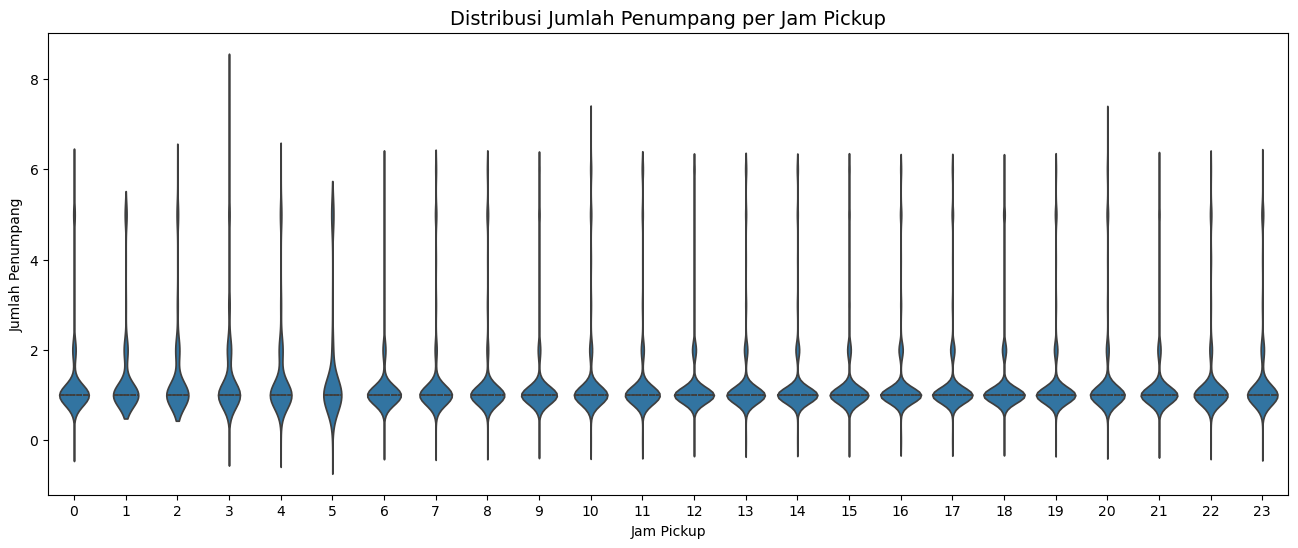

In [331]:
plt.figure(figsize=(16,6))
sns.violinplot(x="pickup_hour", y="passenger_count", data=df_clean, inner="quartile")
plt.title("Distribusi Jumlah Penumpang per Jam Pickup", fontsize=14)
plt.xlabel("Jam Pickup")
plt.ylabel("Jumlah Penumpang")
#plt.ylim(-0.5, 8.5)
plt.show()

In [325]:
df_clean['passenger_count_band'] = pd.cut(df_clean['passenger_count'],
                        bins=[0.5,1.5,2.5,6.5],
                        labels=['pc1','pc2','pc3plus'],
                        right=True, ordered=True)
#dist_mask = dfp['trip_distance'].between(0.1, 100)
groups = [g['trip_distance'].dropna().values for _, g in df_clean.groupby('passenger_count_band')]
H, p = kruskal(*groups)
print(f"[H4] Kruskal trip_distance antar band pc: H={H:.3f}, p={p:.6g}")

[H4] Kruskal trip_distance antar band pc: H=1.856, p=0.395274


Disimpulkan bahwa tidak ada perbedaan berarti dalam distribusi jarak perjalanan antar kelompok jumlah penumpang.

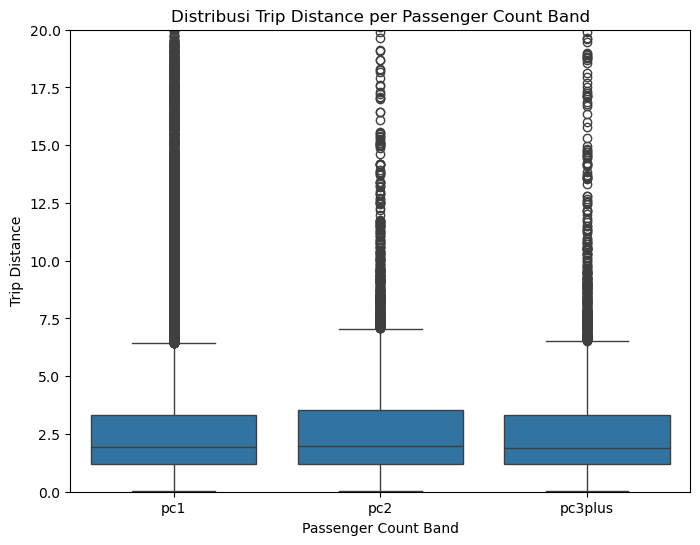

In [327]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_clean, 
    x='passenger_count_band', 
    y='trip_distance'
)

plt.title("Distribusi Trip Distance per Passenger Count Band")
plt.xlabel("Passenger Count Band")
plt.ylabel("Trip Distance")
plt.ylim(0, 20)  
plt.show()

In [334]:
#df_clean.to_csv('dfclean.csv', index = False)